In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import random as rnd

In [2]:
train_df = pd.read_csv('C:/Users/Sebastian/Desktop/train.csv')
test_df = pd.read_csv('C:/Users/Sebastian/Desktop/test.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [4]:
train_df.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [5]:
categorical_varaibles=train_df.describe(include=['O']) #Strings can also be used in the style of select_dtypes (e.g. df.describe(include=['O'])).
categorical_varaibles

,Date.of.Birth,Employment.Type,DisbursalDate,PERFORM_CNS.SCORE.DESCRIPTION,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
count,233154,225493,233154,233154,233154,233154
unique,15433,2,84,20,192,294
top,01-01-88,Self employed,31-10-18,No Bureau History Available,0yrs 0mon,0yrs 0mon
freq,2173,127635,8826,116950,119373,119127


In [6]:
#checking missing values (in percentage)
print(train_df.isnull().sum()*100/train_df.shape[0])

UniqueID                               0.000000
disbursed_amount                       0.000000
asset_cost                             0.000000
ltv                                    0.000000
branch_id                              0.000000
supplier_id                            0.000000
manufacturer_id                        0.000000
Current_pincode_ID                     0.000000
Date.of.Birth                          0.000000
Employment.Type                        3.285811
DisbursalDate                          0.000000
State_ID                               0.000000
Employee_code_ID                       0.000000
MobileNo_Avl_Flag                      0.000000
Aadhar_flag                            0.000000
PAN_flag                               0.000000
VoterID_flag                           0.000000
Driving_flag                           0.000000
Passport_flag                          0.000000
PERFORM_CNS.SCORE                      0.000000
PERFORM_CNS.SCORE.DESCRIPTION          0

In [7]:
print(test_df.isnull().sum()*100/test_df.shape[0])

UniqueID                               0.000000
disbursed_amount                       0.000000
asset_cost                             0.000000
ltv                                    0.000000
branch_id                              0.000000
supplier_id                            0.000000
manufacturer_id                        0.000000
Current_pincode_ID                     0.000000
Date.of.Birth                          0.000000
Employment.Type                        3.063385
DisbursalDate                          0.000000
State_ID                               0.000000
Employee_code_ID                       0.000000
MobileNo_Avl_Flag                      0.000000
Aadhar_flag                            0.000000
PAN_flag                               0.000000
VoterID_flag                           0.000000
Driving_flag                           0.000000
Passport_flag                          0.000000
PERFORM_CNS.SCORE                      0.000000
PERFORM_CNS.SCORE.DESCRIPTION          0

we can see that in both trian and test data we have one variable that is Employment.Type which has less than 4 percent of missing data we can hence we can do mode imputation for the same

In [8]:
train_df = train_df.fillna(train_df.mode().iloc[0])
test_df =  test_df.fillna(test_df.mode().iloc[0])

## Encoding Employment.type

In [9]:
print(train_df['Employment.Type'].isnull().sum(), test_df['Employment.Type'].isnull().sum())

0 0


In [10]:
train_df['self_employed'] = pd.get_dummies(train_df['Employment.Type'],drop_first=True)

In [11]:
train_df['self_employed']

0         0
1         1
2         1
3         1
4         1
         ..
233149    0
233150    1
233151    0
233152    0
233153    0
Name: self_employed, Length: 233154, dtype: uint8

In [12]:
test_df['self_employed'] = pd.get_dummies(test_df['Employment.Type'],drop_first=True)

In [13]:
test_df.drop('Employment.Type',axis=1,inplace=True)

In [14]:
train_df.drop('Employment.Type',axis=1,inplace=True)
train_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,DisbursalDate,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,self_employed
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,03-08-18,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,26-09-18,...,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,01-08-18,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,26-10-18,...,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,26-09-18,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,1


## checking for unique attributes

In [15]:
train_df.nunique()

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Date.of.Birth                           15433
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                         573
PERFORM_CNS.SCORE.DESCRIPTION              20
PRI.NO.OF.ACCTS                           108
PRI.ACTIVE.ACCTS                  

from the above information we can straightaway say that the variable MobileNo_Avl_Flag is not going to provide any unique information to our predictive since it has only 1 class hence we can drop that variable

In [16]:
train_df = train_df.drop(columns = 'MobileNo_Avl_Flag')
test_df = test_df.drop(columns = 'MobileNo_Avl_Flag')

In [17]:
# Lets get all categorical data present
str_cols = train_df.select_dtypes(include = 'object').columns
train_df[str_cols].head()

,Date.of.Birth,DisbursalDate,PERFORM_CNS.SCORE.DESCRIPTION,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,01-01-84,03-08-18,No Bureau History Available,0yrs 0mon,0yrs 0mon
1,31-07-85,26-09-18,I-Medium Risk,1yrs 11mon,1yrs 11mon
2,24-08-85,01-08-18,No Bureau History Available,0yrs 0mon,0yrs 0mon
3,30-12-93,26-10-18,L-Very High Risk,0yrs 8mon,1yrs 3mon
4,09-12-77,26-09-18,No Bureau History Available,0yrs 0mon,0yrs 0mon


In [18]:
str_cols = test_df.select_dtypes(include = 'object').columns
test_df[str_cols].head()

,Date.of.Birth,DisbursalDate,PERFORM_CNS.SCORE.DESCRIPTION,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,01-01-74,03-11-18,No Bureau History Available,0yrs 0mon,0yrs 0mon
1,20-05-85,20-11-18,C-Very Low Risk,0yrs 8mon,1yrs 0mon
2,14-10-95,29-11-18,No Bureau History Available,0yrs 0mon,0yrs 0mon
3,01-06-73,29-11-18,Not Scored: Only a Guarantor,2yrs 5mon,2yrs 5mon
4,01-06-72,17-11-18,No Bureau History Available,0yrs 0mon,0yrs 0mon


here we can see the following insights

   1. We need to change the date and time related variables (Date.of.Birth,DisbursalDate,AVERAGE.ACCT.AGE and AVERAGE.ACCT.AGE)       to int
   2. The beauruea data history is given under the variable PERFORM_CNS.SCORE.DESCRIPTION with 20 distinct classes we need to         figure out a way to encode it such that its acceptable to our model

In [19]:
train_df.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACCTS                          int64
PRI.ACTIVE.ACCTS                         int64
PRI.OVERDUE.A

In [20]:
def age(dob):
    yr = int(dob.split('-')[2])
    if yr >=0 and yr < 21:
        return yr + 2000
    else:
         return yr + 1900
        
test_df['Date.of.Birth'] = test_df['Date.of.Birth'].apply(age)
test_df['DisbursalDate'] = test_df['DisbursalDate'].apply(age)
# Age of the customer at the time of disbursement of fund
test_df['Age'] = test_df['DisbursalDate'] - test_df['Date.of.Birth']

train_df['Date.of.Birth'] = train_df['Date.of.Birth'].apply(age)
train_df['DisbursalDate'] = train_df['DisbursalDate'].apply(age)
# Age of the customer at the time of disbursement of fund
train_df['Age'] = train_df['DisbursalDate'] - train_df['Date.of.Birth']

In [21]:
test_df['Age']

0         44
1         33
2         23
3         45
4         46
          ..
112387    26
112388    34
112389    32
112390    45
112391    44
Name: Age, Length: 112392, dtype: int64

In [22]:
train_df['Age']

0         34
1         33
2         33
3         25
4         41
          ..
233149    30
233150    30
233151    42
233152    24
233153    34
Name: Age, Length: 233154, dtype: int64

In [23]:
train_df.drop(['Date.of.Birth','DisbursalDate'],axis=1,inplace=True)
test_df.drop(['Date.of.Birth','DisbursalDate'],axis=1,inplace=True)

## Perform cns score description

In [24]:
train_df['PERFORM_CNS.SCORE.DESCRIPTION'].describe()

count                          233154
unique                             20
top       No Bureau History Available
freq                           116950
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: object

In [25]:
train_df['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [26]:
def risk(df):

    risk_col = []

    for i in df['PERFORM_CNS.SCORE.DESCRIPTION']:
      if ('Very Low' in i):
          risk_col.append('Very Low Risk')
      elif ('Low' in i):
          risk_col.append('Low Risk')
      elif ('Medium' in i):
          risk_col.append('Medium Risk')
      elif ('High' in i):
          risk_col.append('High Risk')
      elif ('Very High' in i):
          risk_col.append('Very High Risk')
      else: 
          risk_col.append('Not Scored')
    
    df['risk'] = risk_col
    return risk


In [27]:
risk(train_df)
risk(test_df)

<function __main__.risk(df)>

In [28]:
test_df['risk']

0            Not Scored
1         Very Low Risk
2            Not Scored
3            Not Scored
4            Not Scored
              ...      
112387       Not Scored
112388       Not Scored
112389    Very Low Risk
112390    Very Low Risk
112391       Not Scored
Name: risk, Length: 112392, dtype: object

In [29]:
train_df['risk']

0            Not Scored
1           Medium Risk
2            Not Scored
3             High Risk
4            Not Scored
              ...      
233149    Very Low Risk
233150    Very Low Risk
233151       Not Scored
233152       Not Scored
233153       Not Scored
Name: risk, Length: 233154, dtype: object

In [30]:
train_df.drop('PERFORM_CNS.SCORE.DESCRIPTION',axis=1,inplace=True)
test_df.drop('PERFORM_CNS.SCORE.DESCRIPTION',axis=1,inplace=True)

In [31]:
risk_map = {'Not Scored':-1, 
            'Very Low Risk':4,
            'Low Risk':3,
            'Medium Risk':2, 
            'High Risk':1,
            'Very High Risk':0}

train_df['risk'] = train_df['risk'].map(risk_map)
test_df['risk'] = test_df['risk'].map(risk_map)

## Average Account Age and Credit History Length

In [32]:
def duration(dur):
    yrs = int(dur.split(' ')[0].replace('yrs',''))
    mon = int(dur.split(' ')[1].replace('mon',''))
    return yrs*12+mon

In [33]:
train_df['AVERAGE.ACCT.AGE'] = train_df['AVERAGE.ACCT.AGE'].apply(duration)
train_df['CREDIT.HISTORY.LENGTH'] = train_df['CREDIT.HISTORY.LENGTH'].apply(duration)

In [34]:
test_df['AVERAGE.ACCT.AGE'] = test_df['AVERAGE.ACCT.AGE'].apply(duration)
test_df['CREDIT.HISTORY.LENGTH'] = test_df['CREDIT.HISTORY.LENGTH'].apply(duration)

## Feature importances using SelectKBest algorithm using chi2

In [35]:
df1 = train_df[['self_employed','Aadhar_flag','PAN_flag','VoterID_flag','Driving_flag',
         'Passport_flag', 'State_ID', 'manufacturer_id']]

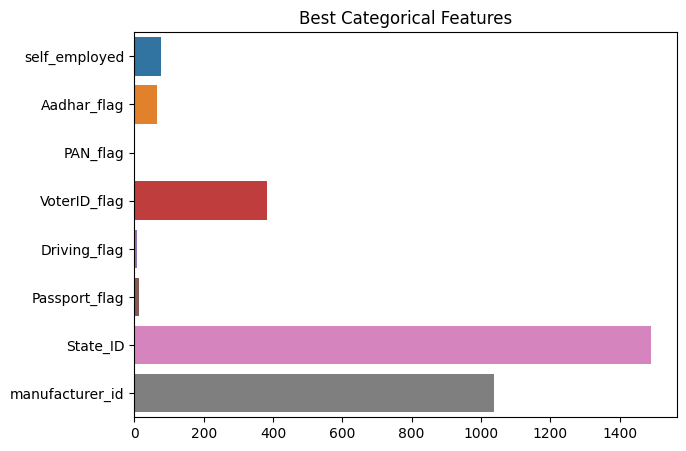

In [36]:
from sklearn.feature_selection import SelectKBest,chi2

n = SelectKBest(score_func = chi2, k = 'all')
catcols = n.fit(df1, train_df['loan_default'])
plt.figure(figsize = (7,5))
sns.barplot(x = catcols.scores_, y = df1.columns)
plt.title('Best Categorical Features')
plt.show()

## Feature importances using Extra Trees Classifier

In [37]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(df1, train_df['loan_default'])

ExtraTreesClassifier()

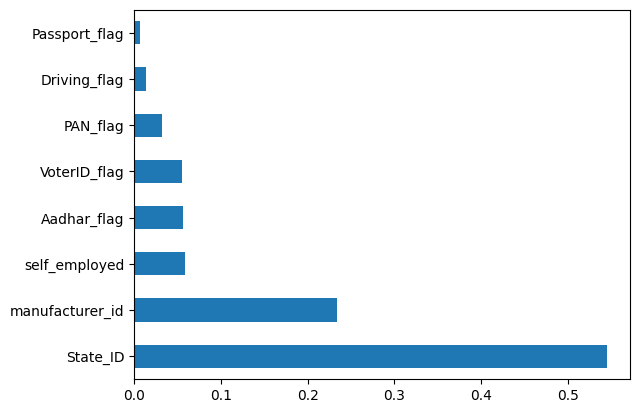

In [38]:
features_rank = pd.Series(model.feature_importances_, index=df1.columns)
features_rank.nlargest(8).plot(kind='barh')
plt.show()

In [39]:
# Dropping unncessary features based on the above analysis

train_df.drop(['PAN_flag','Driving_flag','Passport_flag'],axis=1,inplace=True)
test_df.drop(['PAN_flag','Driving_flag','Passport_flag'],axis=1,inplace=True)

## Delinquent Accounts in last six months

In [40]:
counts = train_df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()
percentage = train_df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts(normalize=True)*100

pd.DataFrame({'counts':counts,'percent_of_data':percentage})

,counts,percent_of_data
0,214959,92.196145
1,14941,6.408211
2,2470,1.059386
3,537,0.230320
4,138,0.059188
5,58,0.024876
6,20,0.008578
7,13,0.005576
8,7,0.003002
12,3,0.001287


We can see that 92% of customers have not defaulted loans in last six months. 8% of customers have deafulted loans for >= 1 time

## No of Inquiries

In [41]:
counts = train_df['NO.OF_INQUIRIES'].value_counts()
percent = train_df['NO.OF_INQUIRIES'].value_counts(normalize=True)*100

pd.DataFrame({'counts':counts,'percent_of_data':percent})

,counts,percent_of_data
0,201961,86.621289
1,22285,9.558060
2,5409,2.319926
3,1767,0.757868
4,760,0.325965
5,343,0.147113
6,239,0.102507
7,135,0.057902
8,105,0.045035
9,44,0.018872


Most of the customers have not made any enquiries regarding loans

The ID variable dilemma here we need to look out for ID related variables such as manufacturer id employee id etc. how do we need whether we should select these variables? lets look from a financial standpoint

1. UniqueID : this is purely nominal and needs to be dropped

2. supplier_id : needs to be dropped beacuse it is nominal

3. Current_pincode_ID : denotes location and has nothing to do with probablity of default or default prediction will be dropped

4. Branch.id : This is purely nominal and has no order at all so we can drop this variable

5. State_ID - Donotes the states registration of the vehicle (like MH for maharashtra , KA for karnataka) this may matter because prices of vehicels vary state to state

6. Employee_code_ID : purely nominal - dropped

7. VoterID_flag - certainly will make an impact... should be there in our analysis

8. manufacturer_id : this should be considered since prices vary manufacturer to manufacturer

In [42]:
ids_to_drop = ['UniqueID','supplier_id','Current_pincode_ID','branch_id','Employee_code_ID']
train_df=train_df.drop(columns=ids_to_drop)
test_df=test_df.drop(columns=ids_to_drop)

In [43]:
train_df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'manufacturer_id', 'State_ID',
       'Aadhar_flag', 'VoterID_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default',
       'self_employed', 'Age', 'risk'],
      dtype='object')

In [44]:
test_df

,disbursed_amount,asset_cost,ltv,manufacturer_id,State_ID,Aadhar_flag,VoterID_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,...,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,self_employed,Age,risk
0,53478,63558,86.54,45,6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,44,-1
1,55513,63163,89.45,45,6,1,0,749,2,1,...,5605,0,1,0,8,12,1,1,33,4
2,65282,84320,79.93,86,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,23,-1
3,46905,63896,76.58,45,4,1,0,14,1,1,...,0,0,0,0,29,29,0,1,45,-1
4,51428,63896,86.08,45,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,46,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112387,44875,72509,67.58,86,4,1,0,0,0,0,...,0,0,0,0,0,0,0,1,26,-1
112388,53549,72509,78.61,86,4,1,0,0,0,0,...,0,0,0,0,0,0,0,1,34,-1
112389,55243,72509,81.37,86,4,1,0,785,2,0,...,0,0,0,0,58,113,0,1,32,4
112390,55243,72509,81.37,86,4,1,0,714,1,1,...,0,0,1,1,3,3,0,1,45,4


## Numerical Features Analysis

In [45]:
df2 = train_df[['disbursed_amount', 'asset_cost', 'ltv', 'manufacturer_id', 'State_ID',
       'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH',
       'NO.OF_INQUIRIES', 'Age', 'risk']]

In [46]:
model_2 = ExtraTreesClassifier()
model_2.fit(df2, train_df['loan_default'])

ExtraTreesClassifier()

In [47]:
pd.DataFrame(model_2.feature_importances_, index = df2.columns,
             columns = ['Feature_Importances']).sort_values(by = 'Feature_Importances',
             ascending = False)

,Feature_Importances
ltv,0.164030
disbursed_amount,0.156101
asset_cost,0.155717
Age,0.120187
State_ID,0.065019
CREDIT.HISTORY.LENGTH,0.031236
AVERAGE.ACCT.AGE,0.030539
manufacturer_id,0.029420
PERFORM_CNS.SCORE,0.029228
PRIMARY.INSTAL.AMT,0.028640


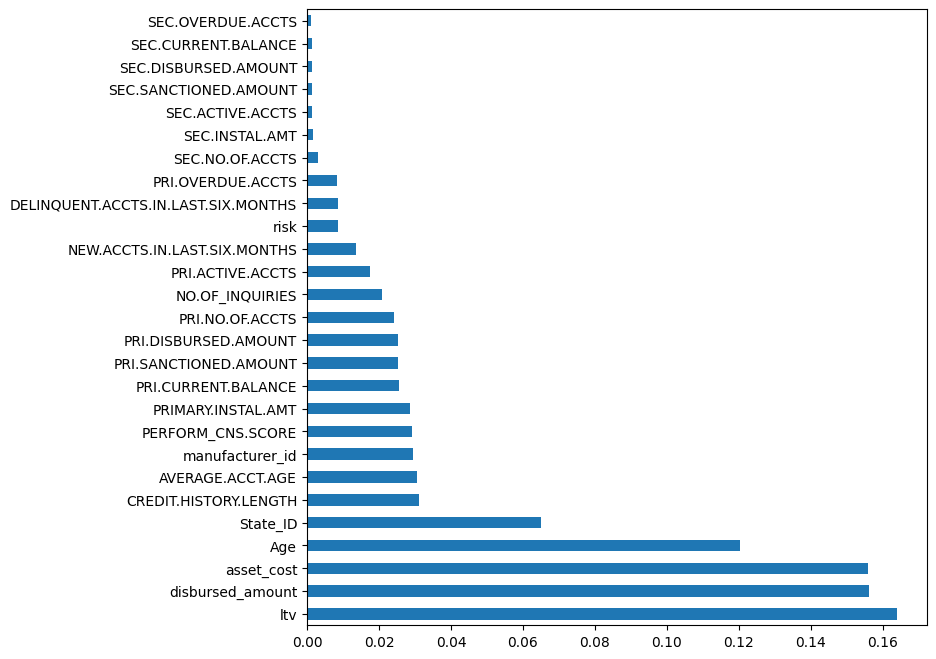

In [48]:
plt.figure(figsize = (8,8))
ranked_features = pd.Series(model_2.feature_importances_, index = df2.columns)
ranked_features.nlargest(27).plot(kind = 'barh')
plt.show()

We cannot drop the secondary account details as they are asked by the institutions before granting loan.

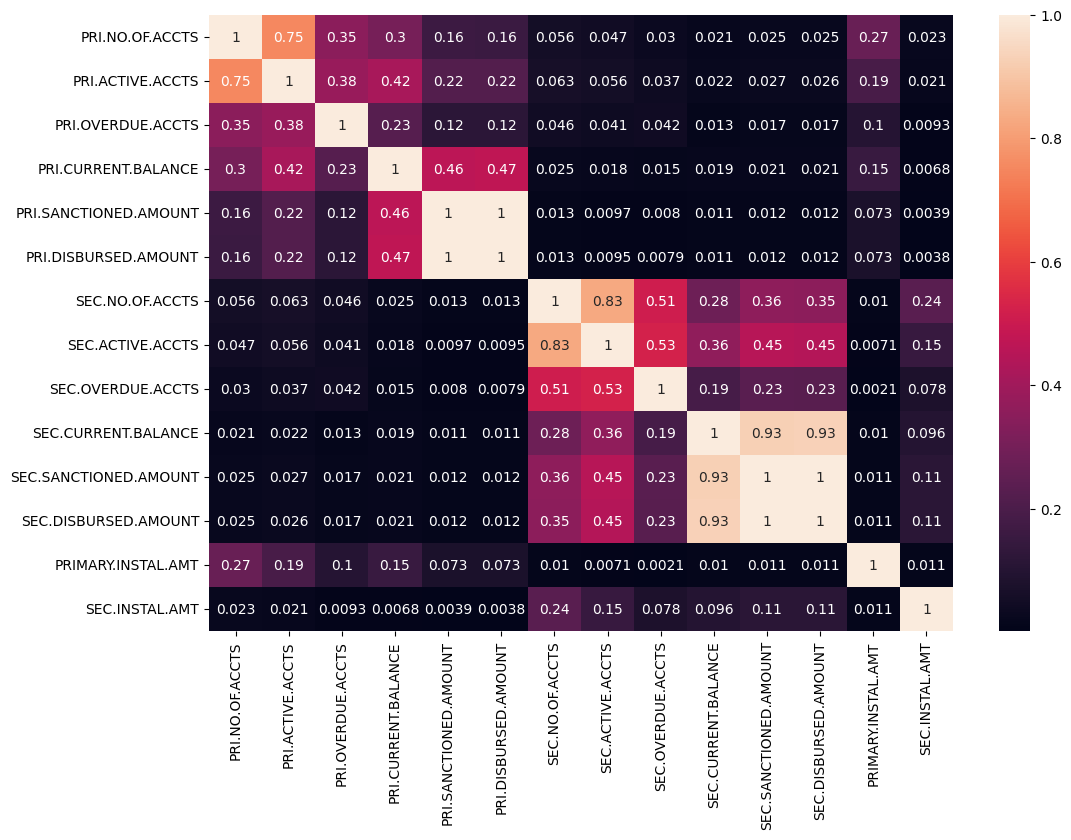

In [49]:
# Checking the correlation between primary and secondary accounts
plt.figure(figsize=(12,8))
sns.heatmap(df2[['PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT']].corr(), annot = True)
plt.show()

There is no correlation between primary and secondary accounts

## Primary and Secondary Accounts

In [50]:
# Combining the Primary and Secondary Accounts "train"

train_df['no_of_accts'] = train_df['PRI.NO.OF.ACCTS'] + train_df['SEC.NO.OF.ACCTS']
train_df['active_accts'] = train_df['PRI.ACTIVE.ACCTS'] + train_df['SEC.ACTIVE.ACCTS']
train_df['overdue_accts'] = train_df['PRI.OVERDUE.ACCTS'] + train_df['SEC.OVERDUE.ACCTS']
train_df['outstanding_amount'] = train_df['PRI.CURRENT.BALANCE'] + train_df['SEC.CURRENT.BALANCE']
train_df['sanctioned_amount'] = train_df['PRI.SANCTIONED.AMOUNT'] + train_df['SEC.SANCTIONED.AMOUNT']
train_df['psdisbursed_amount'] = train_df['PRI.DISBURSED.AMOUNT'] + train_df['SEC.DISBURSED.AMOUNT']
train_df['install_amt'] = train_df['PRIMARY.INSTAL.AMT'] + train_df['SEC.INSTAL.AMT']
     

In [51]:
# Combining the Primary and Secondary Accounts "test"

test_df['no_of_accts'] = test_df['PRI.NO.OF.ACCTS'] + test_df['SEC.NO.OF.ACCTS']
test_df['active_accts'] = test_df['PRI.ACTIVE.ACCTS'] + test_df['SEC.ACTIVE.ACCTS']
test_df['overdue_accts'] = test_df['PRI.OVERDUE.ACCTS'] + test_df['SEC.OVERDUE.ACCTS']
test_df['outstanding_amount'] = test_df['PRI.CURRENT.BALANCE'] + test_df['SEC.CURRENT.BALANCE']
test_df['sanctioned_amount'] = test_df['PRI.SANCTIONED.AMOUNT'] + test_df['SEC.SANCTIONED.AMOUNT']
test_df['psdisbursed_amount'] = test_df['PRI.DISBURSED.AMOUNT'] + test_df['SEC.DISBURSED.AMOUNT']
test_df['install_amt'] = test_df['PRIMARY.INSTAL.AMT'] + test_df['SEC.INSTAL.AMT']

In [52]:
to_drop = ['PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT']
train_df=train_df.drop(columns=to_drop)
test_df=test_df.drop(columns=to_drop)

In [53]:
df3 = train_df[['disbursed_amount', 'asset_cost', 'ltv','PERFORM_CNS.SCORE', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'Age', 'risk', 'no_of_accts', 'active_accts',
       'overdue_accts', 'outstanding_amount', 'sanctioned_amount',
       'psdisbursed_amount', 'install_amt']]

<AxesSubplot:>

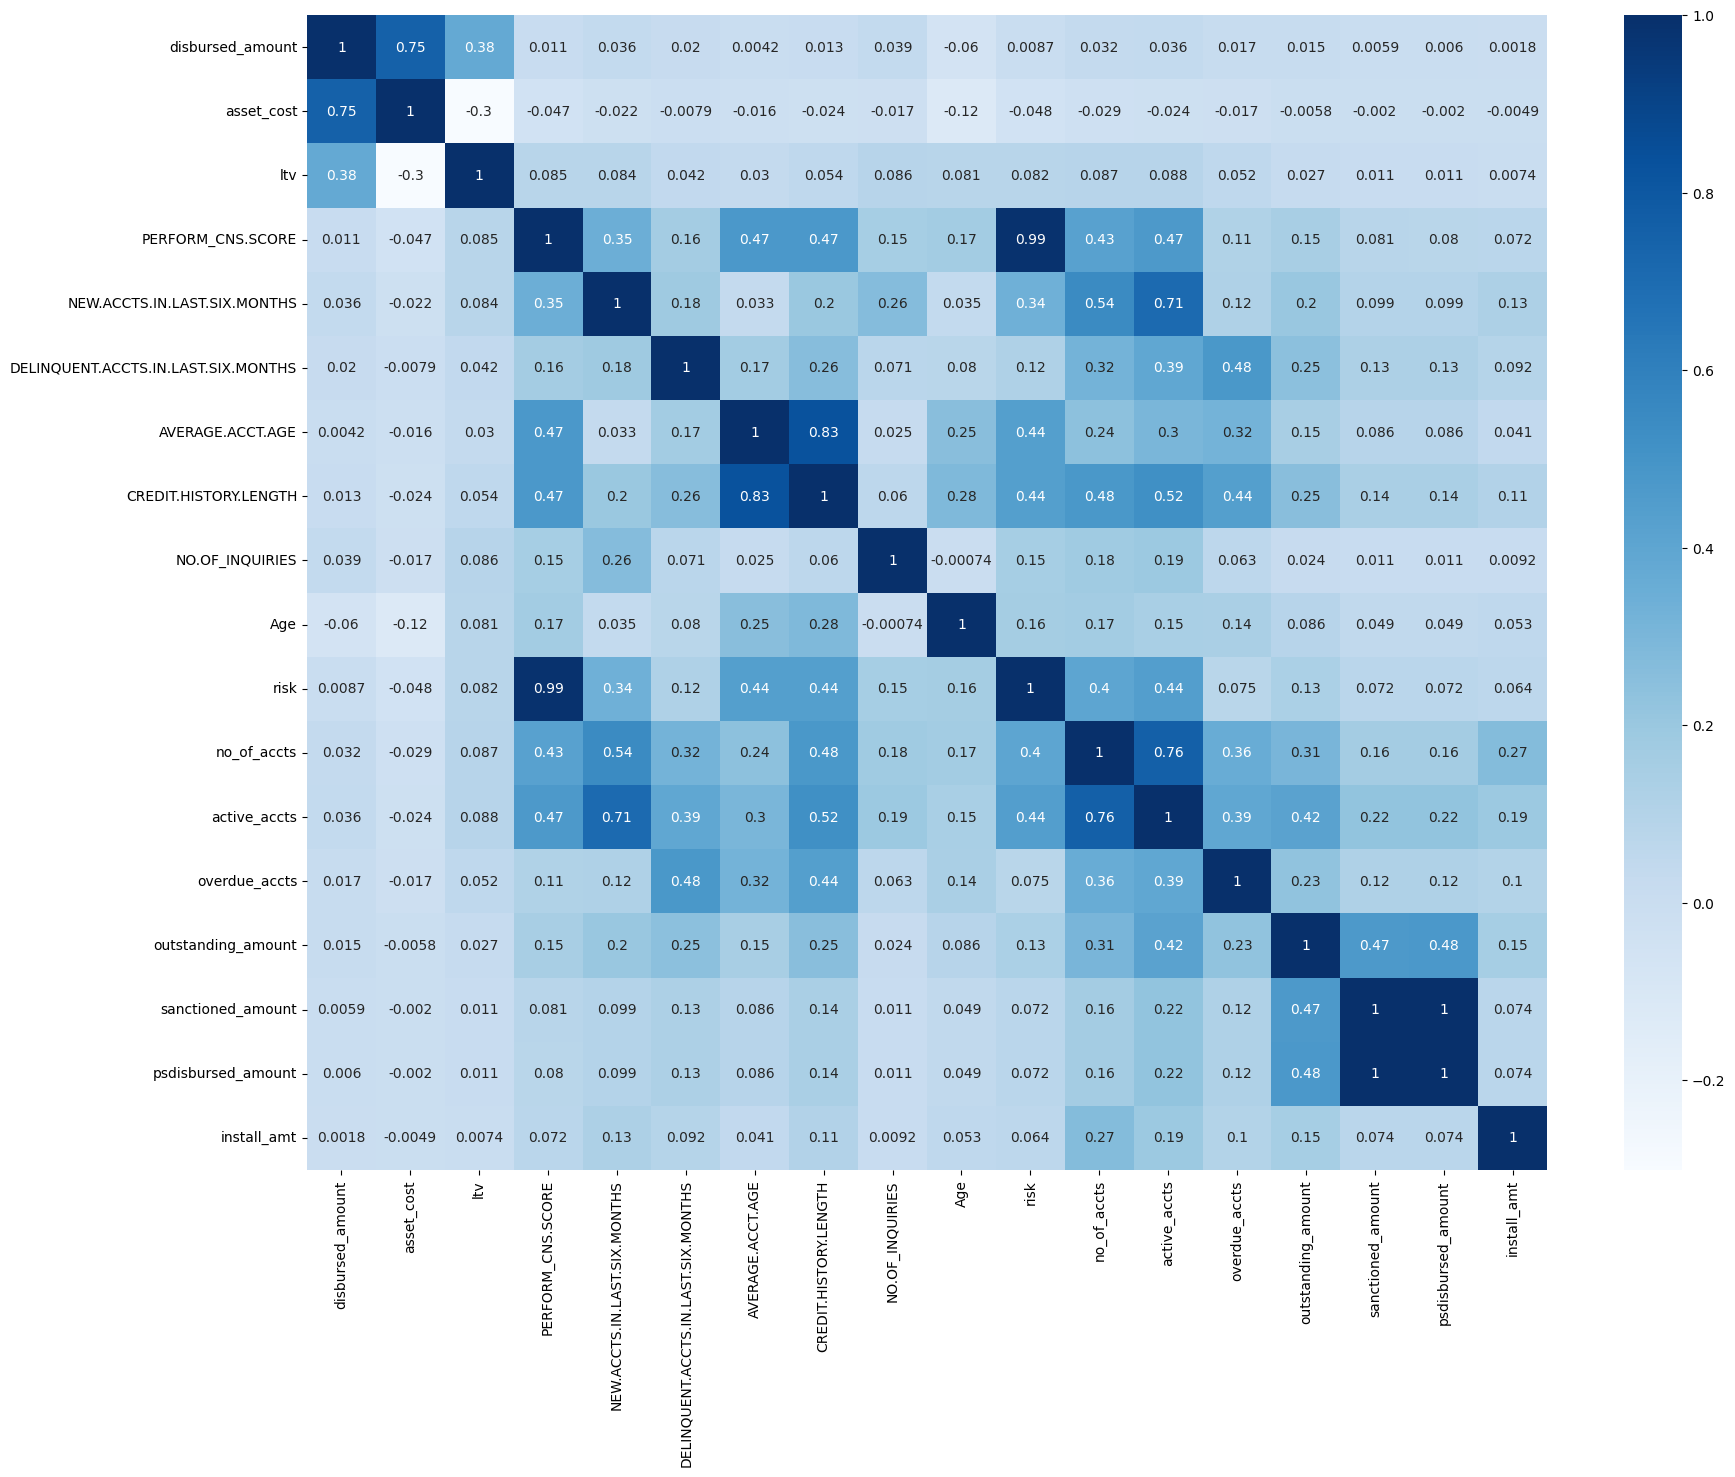

In [54]:
plt.figure(figsize=(20,15))
sns.heatmap(df3.corr(), annot= True, cmap = 'Blues')

From the above correlation heatmap, we can see that some of the features are highly correlated(>0.75) with each other.

• --- disbursed amount and asset cost - 0.75

• --- perform_cns.score and risk - 0.98

• --- average_acct_age and credit_history_length - 0.83

• --- no_of_accts and active_accts - 0.76

• --- sanctioned_amount and psdisbursed_amount - 1

In [55]:
model = ExtraTreesClassifier()
model.fit(df3, train_df['loan_default'])

ExtraTreesClassifier()

In [56]:
pd.DataFrame(model.feature_importances_, index= df3.columns,
             columns = ['Feature_Importances']).sort_values(by='Feature_Importances',
             ascending= False)

,Feature_Importances
ltv,0.195080
asset_cost,0.192124
disbursed_amount,0.183095
Age,0.103638
CREDIT.HISTORY.LENGTH,0.035387
AVERAGE.ACCT.AGE,0.034188
install_amt,0.033808
PERFORM_CNS.SCORE,0.032059
outstanding_amount,0.030058
psdisbursed_amount,0.029390


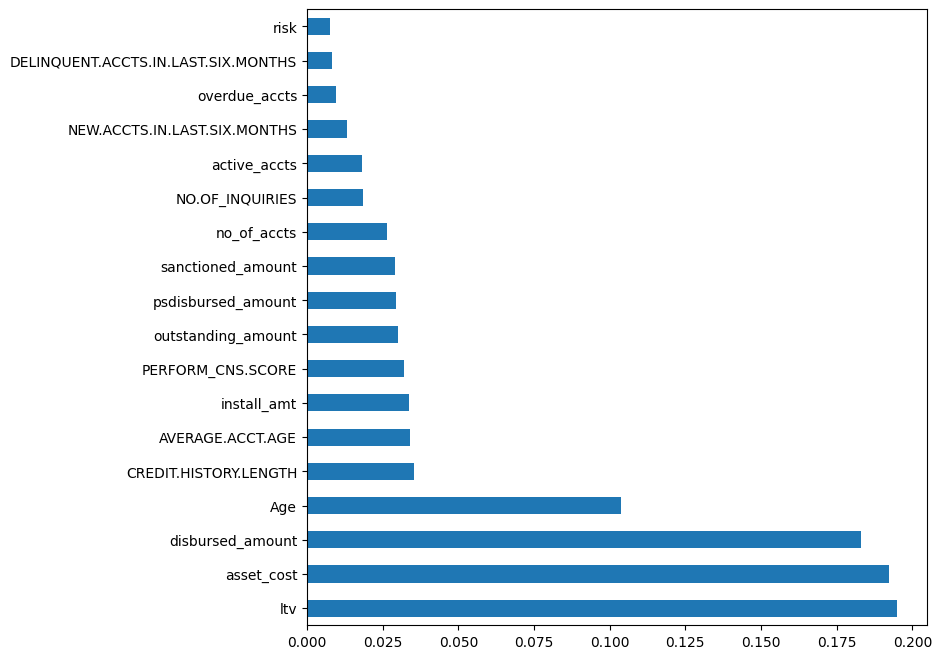

In [57]:
plt.figure(figsize=(8,8))
ranked_features = pd.Series(model.feature_importances_, index= df3.columns)
ranked_features.nlargest(18).plot(kind= 'barh')
plt.show()

In [58]:
train_df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'manufacturer_id', 'State_ID',
       'Aadhar_flag', 'VoterID_flag', 'PERFORM_CNS.SCORE',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'self_employed', 'Age', 'risk', 'no_of_accts',
       'active_accts', 'overdue_accts', 'outstanding_amount',
       'sanctioned_amount', 'psdisbursed_amount', 'install_amt'],
      dtype='object')

In [59]:
to_drop = ['asset_cost','PERFORM_CNS.SCORE','AVERAGE.ACCT.AGE','no_of_accts','psdisbursed_amount','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']
train_df=train_df.drop(columns=to_drop)
test_df=test_df.drop(columns=to_drop)

In [60]:
train_df.head()

,disbursed_amount,ltv,manufacturer_id,State_ID,Aadhar_flag,VoterID_flag,NEW.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,self_employed,Age,risk,active_accts,overdue_accts,outstanding_amount,sanctioned_amount,install_amt
0,50578,89.55,45,6,1,0,0,0,0,0,0,34,-1,0,0,0,0,0
1,47145,73.23,45,6,1,0,0,23,0,1,1,33,2,1,1,27600,50200,1991
2,53278,89.63,45,6,1,0,0,0,0,0,1,33,-1,0,0,0,0,0
3,57513,88.48,45,6,1,0,0,15,1,1,1,25,1,0,0,0,0,31
4,52378,88.39,45,6,1,0,0,0,1,1,1,41,-1,0,0,0,0,0


In [61]:
train_df.shape

(233154, 18)

## Checking and Handling outliers

In [62]:
df12 = train_df[['disbursed_amount', 'ltv',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'Age', 'active_accts', 'overdue_accts',
       'outstanding_amount', 'sanctioned_amount', 'install_amt']]

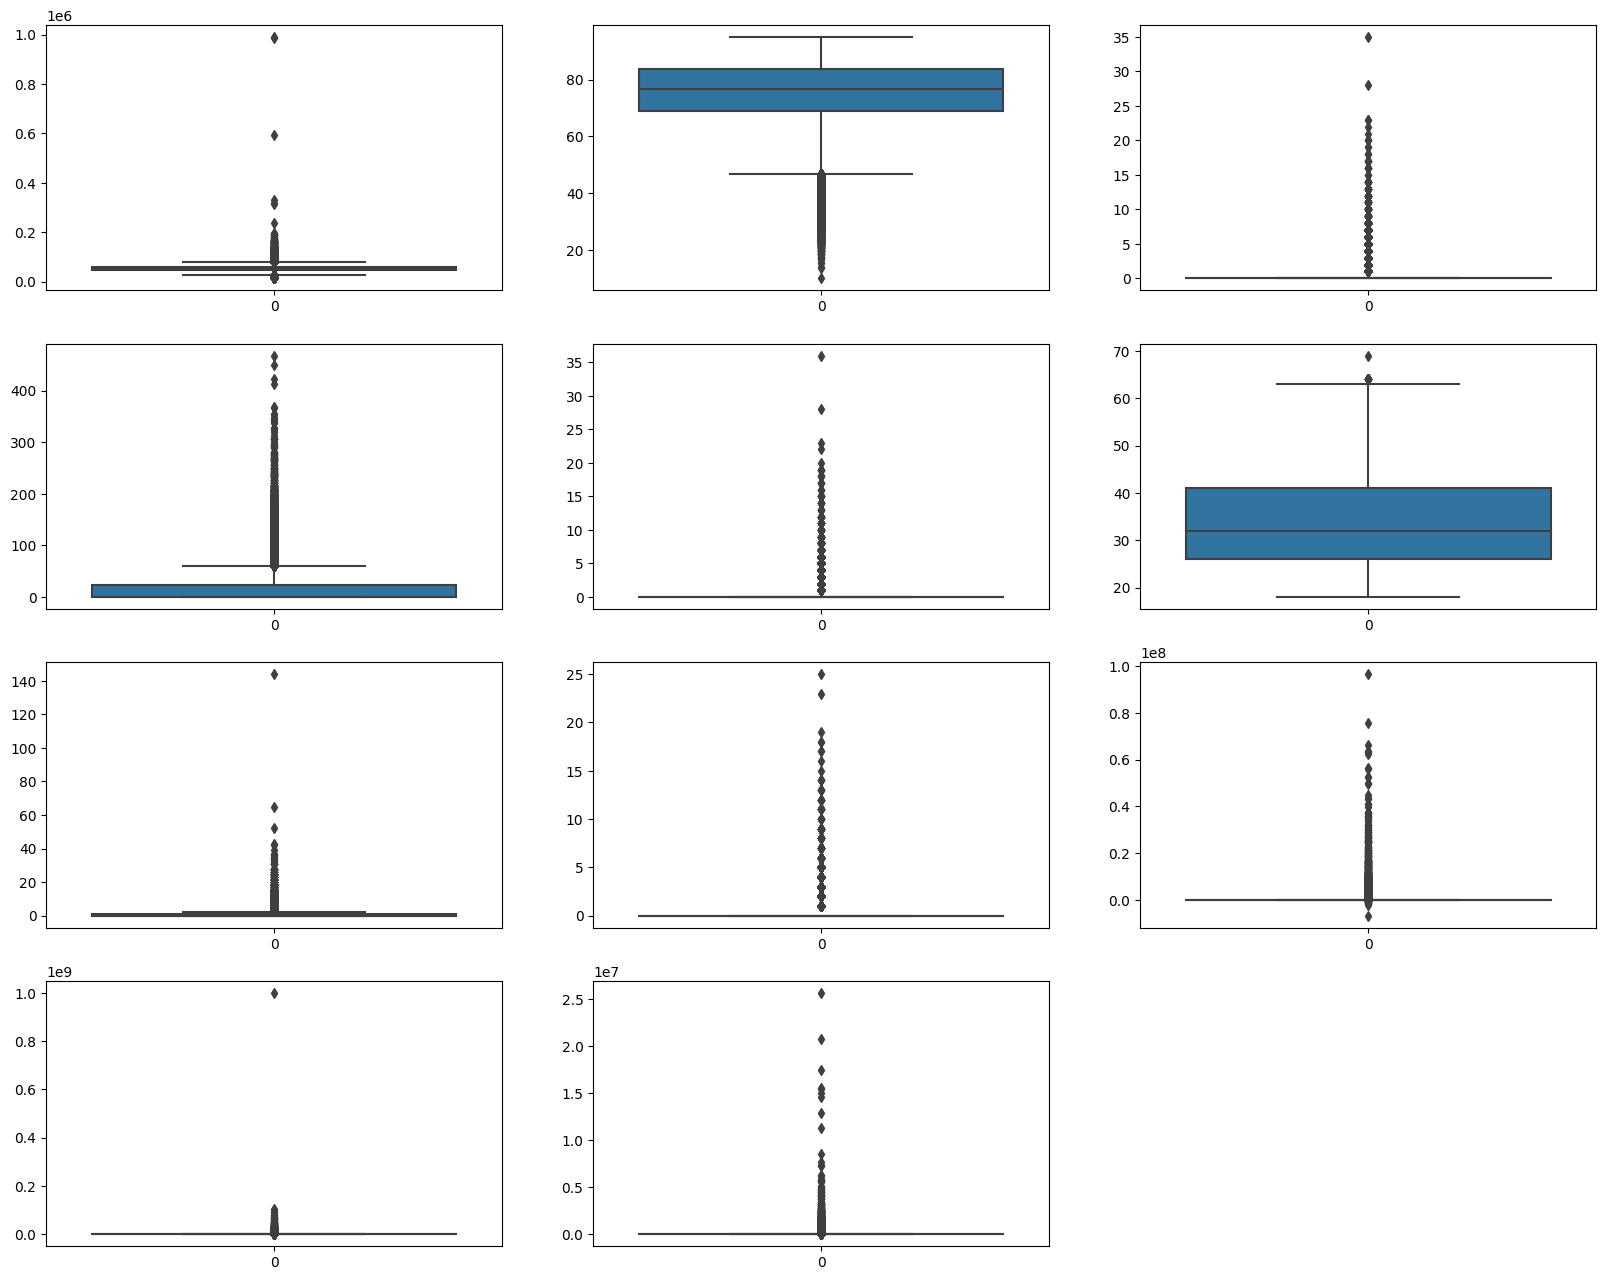

In [63]:
plt.figure(figsize=(20,20))
x = 1
for column in df12.columns:
    if x<=11:
        plt.subplot(5,3,x)
        sns.boxplot(train_df[column])
    x+=1
plt.show()

In [64]:
testdf12 = test_df[['disbursed_amount', 'ltv',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'Age', 'active_accts', 'overdue_accts',
       'outstanding_amount', 'sanctioned_amount', 'install_amt']]

In [65]:
train_df = train_df[train_df['disbursed_amount']<max(train_df['disbursed_amount'])]
train_df = train_df[train_df['NEW.ACCTS.IN.LAST.SIX.MONTHS']<25]
train_df = train_df[train_df['CREDIT.HISTORY.LENGTH']<400]
train_df = train_df[train_df['NO.OF_INQUIRIES']<25]
train_df = train_df[train_df['active_accts']<50]
train_df = train_df[train_df['sanctioned_amount']<max(train_df['sanctioned_amount'])]

In [66]:
for i in range(0,100,10):
    var = train_df['outstanding_amount'].values
    var = np.sort(var, axis = None )
    print('{} percentile value is {}'.format(i, var[int(len(var)*(float(i)/100))]))
print(('100 percentile value is ', var[-1]))

0 percentile value is -6678296
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 0
60 percentile value is 0
70 percentile value is 18150
80 percentile value is 66474
90 percentile value is 317224
('100 percentile value is ', 75603400)


In [67]:
train_df = train_df[(train_df['outstanding_amount']>-6678296) & (train_df['outstanding_amount']<75603400)]

In [68]:
train_df = train_df[train_df['install_amt']<10000000]

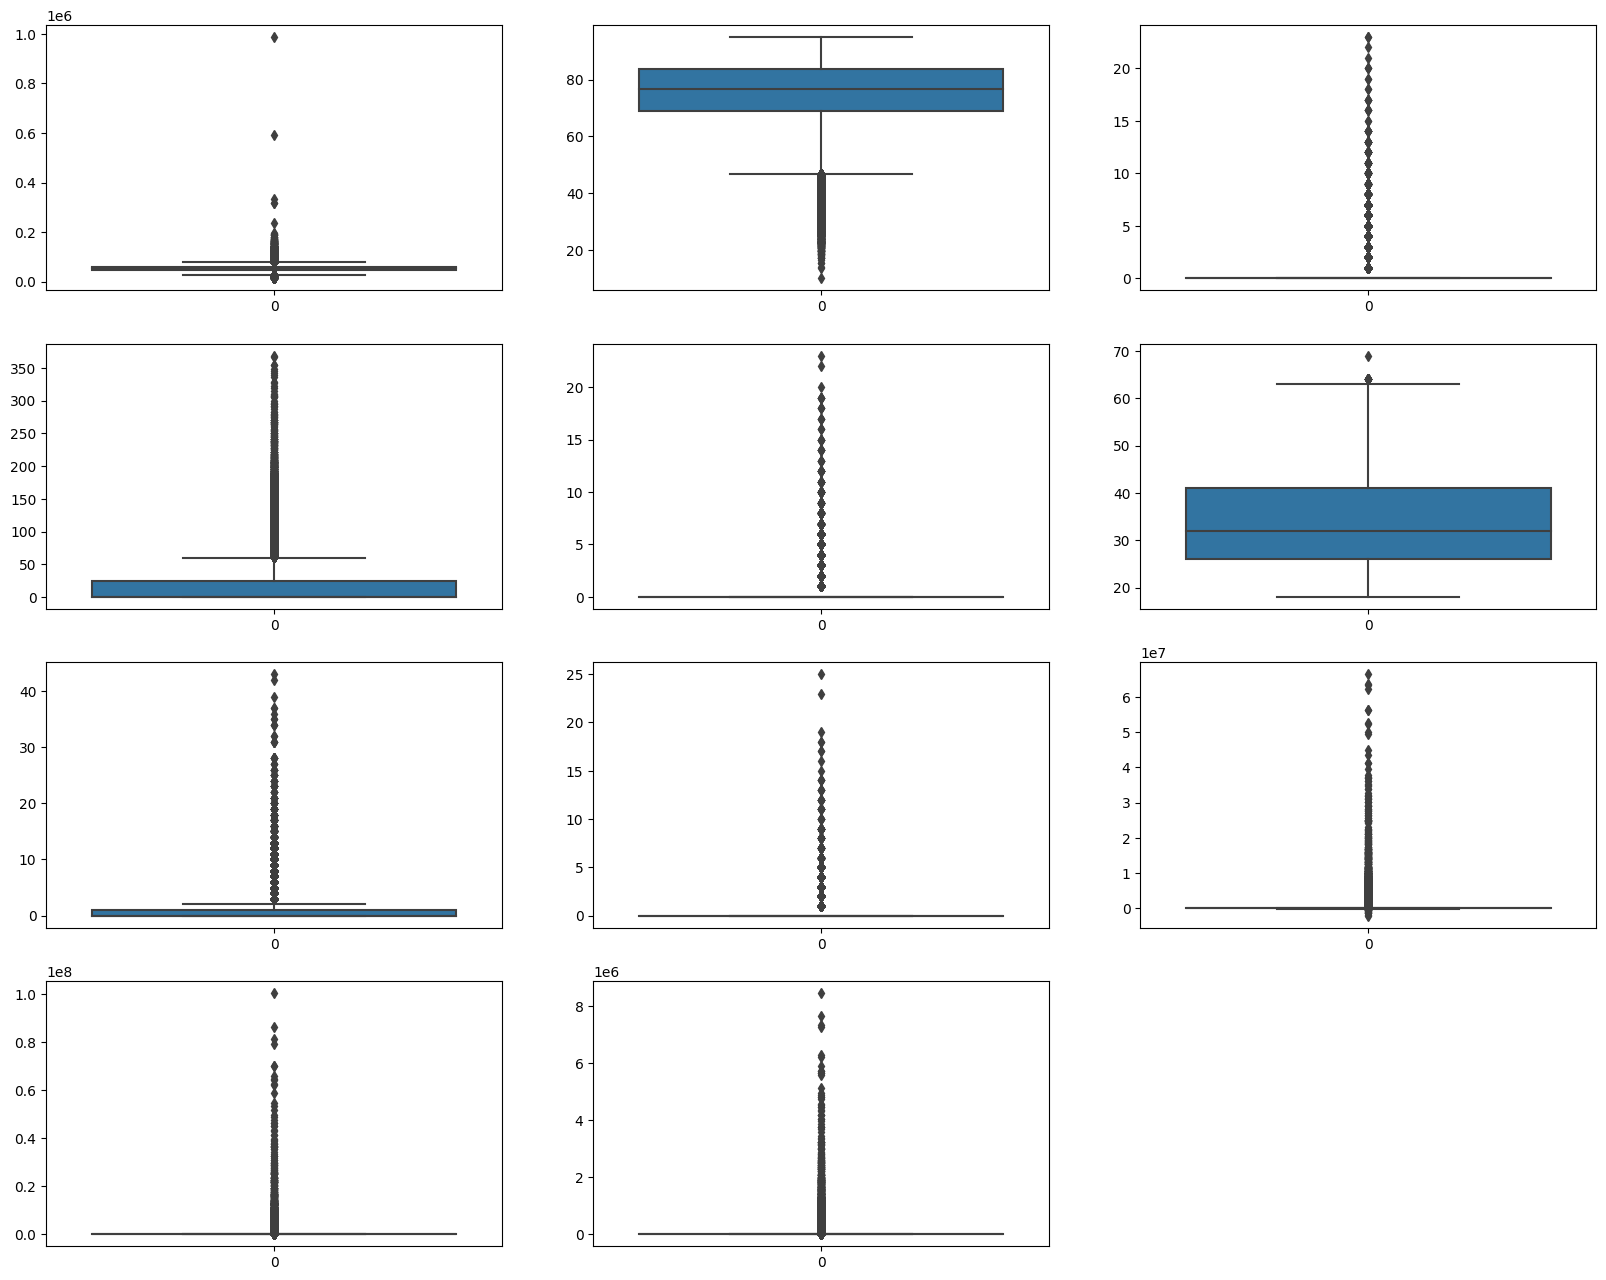

In [69]:
plt.figure(figsize=(20,20))
x = 1
for column in df12.columns:
    if x<=11:
        plt.subplot(5,3,x)
        sns.boxplot(train_df[column])
    x+=1
plt.show()

In [70]:
# Removing few more outliers/extreme values

train_df = train_df[train_df['disbursed_amount']<250000]
train_df = train_df[train_df['outstanding_amount']<40000000]
train_df = train_df[train_df['sanctioned_amount']<0.800000e+08]
train_df = train_df[train_df['install_amt']<=5.000000e+06]

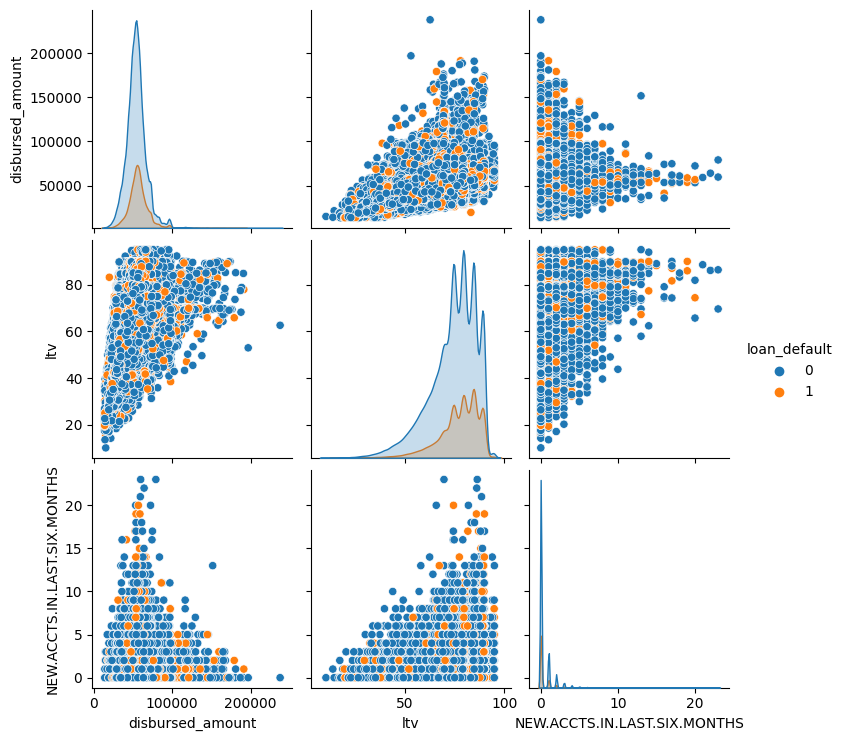

In [71]:
n = train_df.shape[0]
sns.pairplot(train_df[['disbursed_amount', 'ltv','NEW.ACCTS.IN.LAST.SIX.MONTHS', 
                 'loan_default']][0:n], hue='loan_default', 
             vars=['disbursed_amount', 'ltv','NEW.ACCTS.IN.LAST.SIX.MONTHS'])
plt.show()

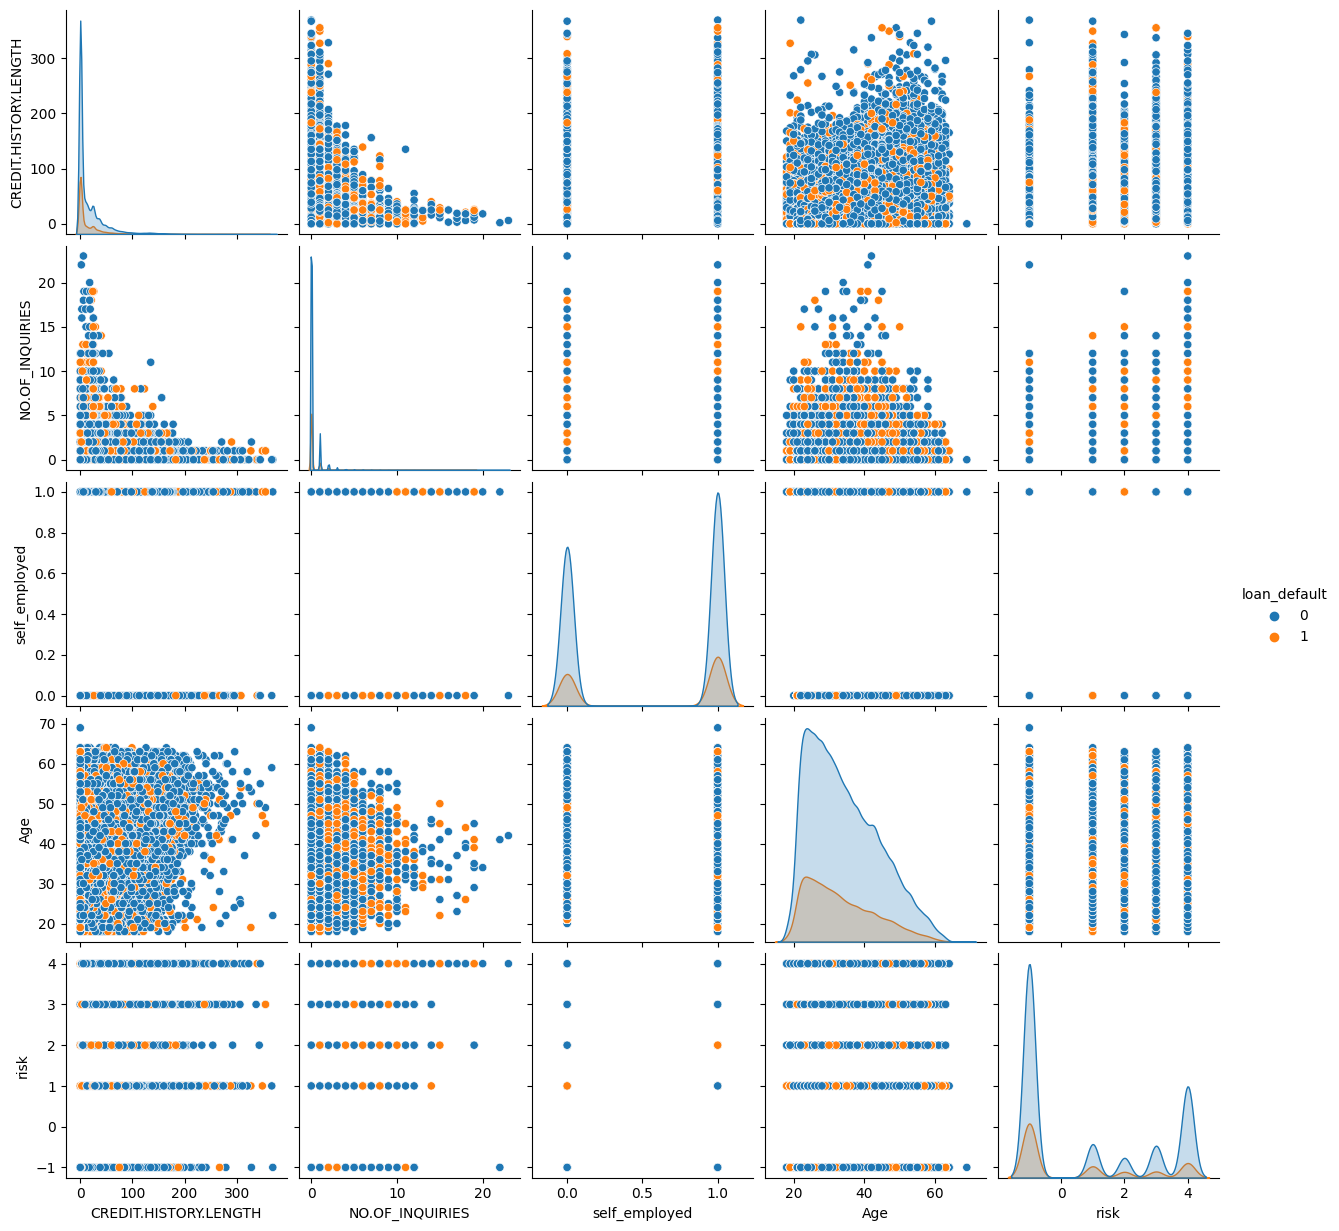

In [72]:
n = train_df.shape[0]
sns.pairplot(train_df[['CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'self_employed', 'Age', 'risk','loan_default']][0:n], hue='loan_default', 
             vars=['CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'self_employed', 'Age', 'risk'])
plt.show()

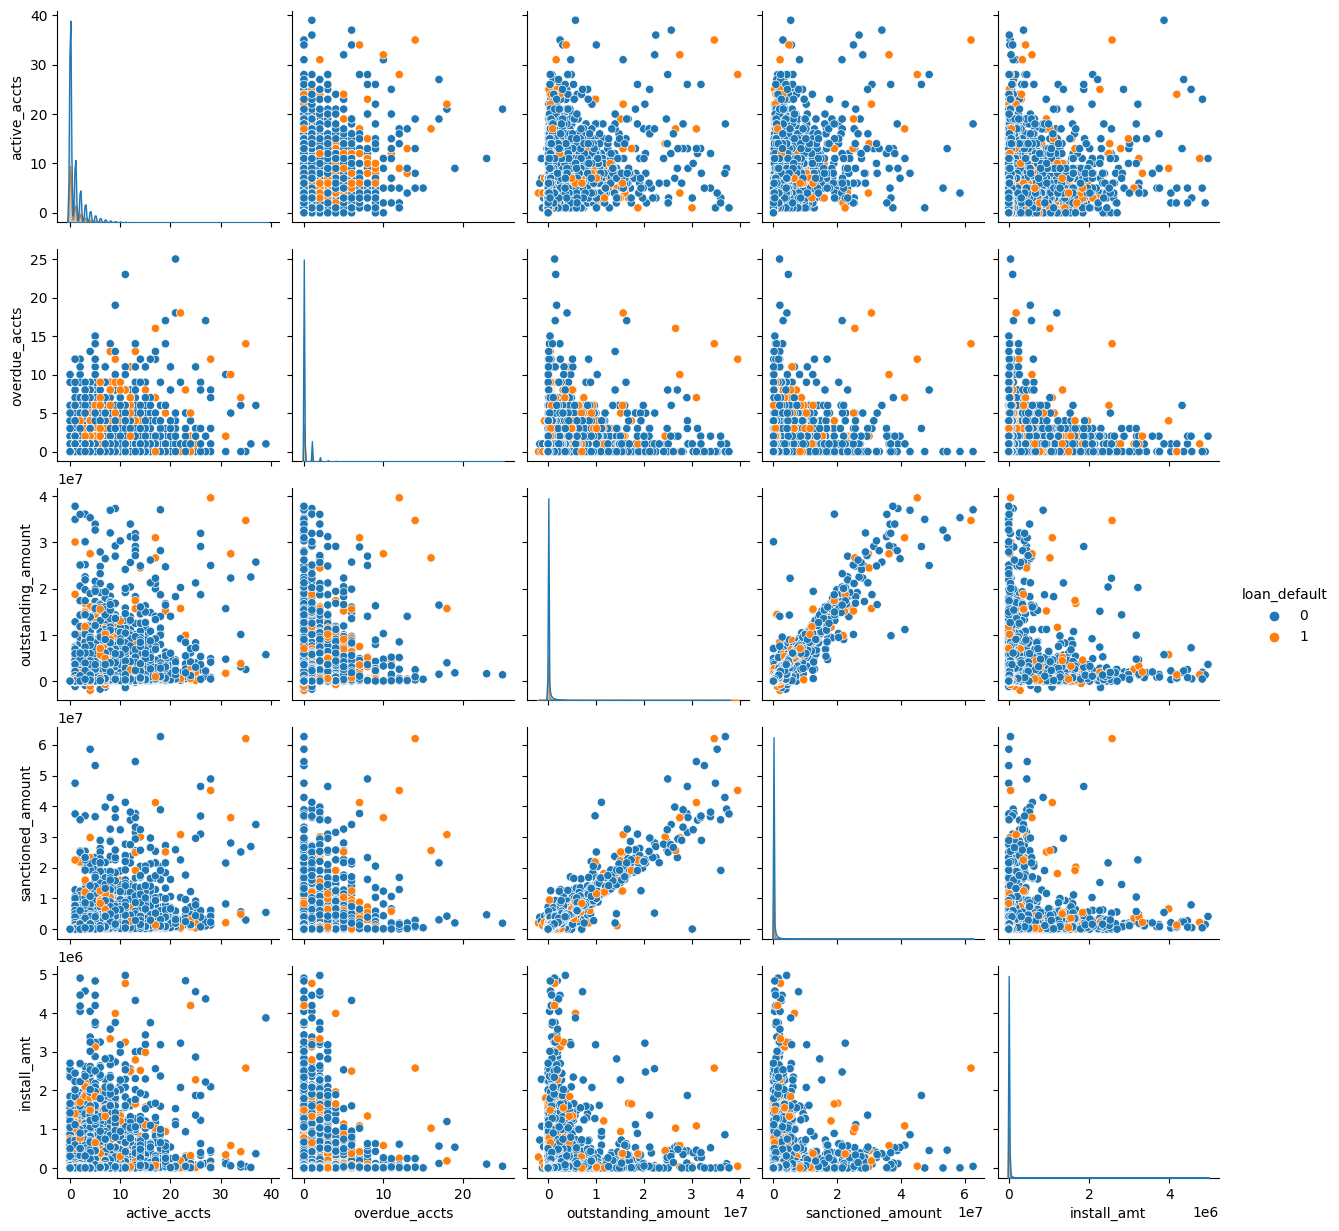

In [73]:
n = train_df.shape[0]
sns.pairplot(train_df[['active_accts', 'overdue_accts',
       'outstanding_amount', 'sanctioned_amount', 'install_amt','loan_default']][0:n], hue='loan_default', 
             vars=['active_accts', 'overdue_accts',
       'outstanding_amount', 'sanctioned_amount', 'install_amt'])
plt.show()

In [74]:
train_df.columns

Index(['disbursed_amount', 'ltv', 'manufacturer_id', 'State_ID', 'Aadhar_flag',
       'VoterID_flag', 'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'CREDIT.HISTORY.LENGTH',
       'NO.OF_INQUIRIES', 'loan_default', 'self_employed', 'Age', 'risk',
       'active_accts', 'overdue_accts', 'outstanding_amount',
       'sanctioned_amount', 'install_amt'],
      dtype='object')

In [75]:
train_df

,disbursed_amount,ltv,manufacturer_id,State_ID,Aadhar_flag,VoterID_flag,NEW.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,self_employed,Age,risk,active_accts,overdue_accts,outstanding_amount,sanctioned_amount,install_amt
0,50578,89.55,45,6,1,0,0,0,0,0,0,34,-1,0,0,0,0,0
1,47145,73.23,45,6,1,0,0,23,0,1,1,33,2,1,1,27600,50200,1991
2,53278,89.63,45,6,1,0,0,0,0,0,1,33,-1,0,0,0,0,0
3,57513,88.48,45,6,1,0,0,15,1,1,1,25,1,0,0,0,0,31
4,52378,88.39,45,6,1,0,0,0,1,1,1,41,-1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,60.72,48,6,0,1,0,39,0,0,0,30,4,3,0,390443,416133,4084
233150,73651,74.95,51,6,0,1,0,6,0,0,1,30,4,0,0,0,0,1565
233151,33484,48.45,86,4,1,0,0,0,0,0,0,42,-1,0,0,0,0,0
233152,34259,49.10,86,4,1,0,0,0,0,0,0,24,-1,0,0,0,0,0


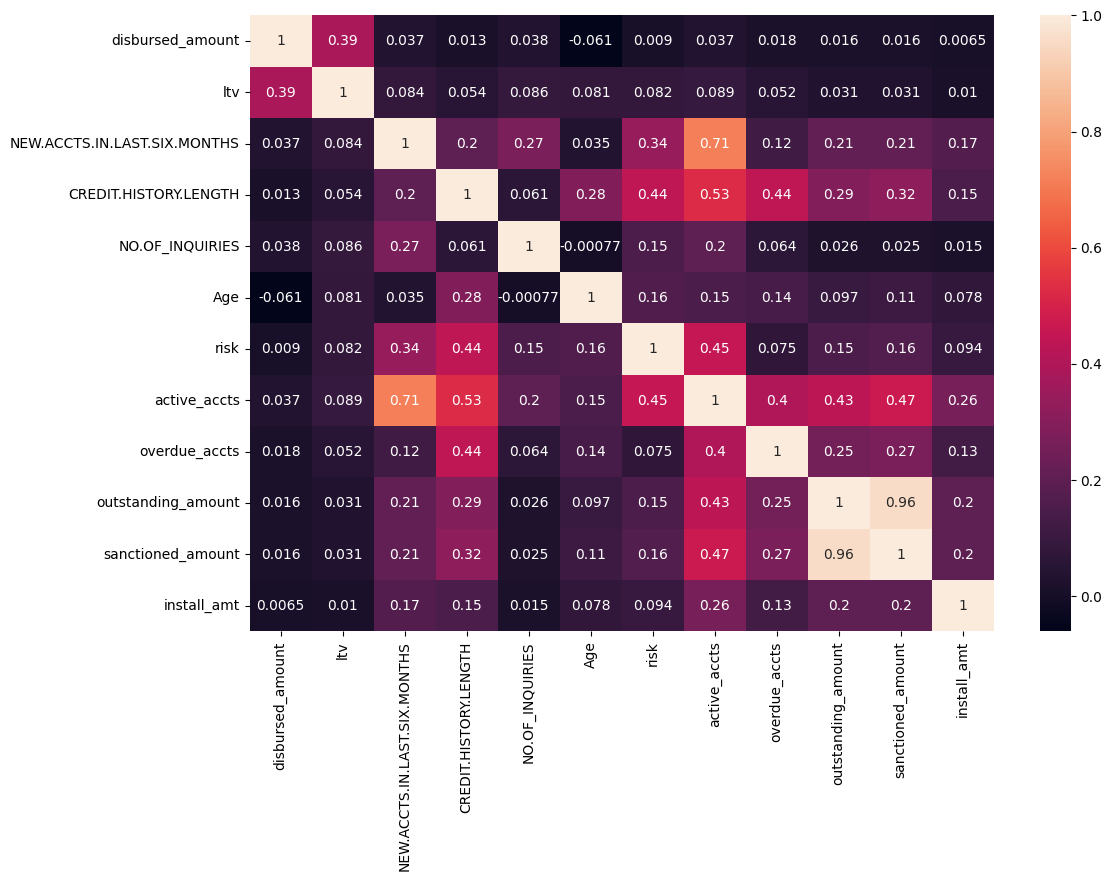

In [76]:
plt.figure(figsize=(12,8))
sns.heatmap(train_df[['disbursed_amount', 'ltv','NEW.ACCTS.IN.LAST.SIX.MONTHS','CREDIT.HISTORY.LENGTH','NO.OF_INQUIRIES',
               'Age','risk','active_accts', 'overdue_accts', 'outstanding_amount','sanctioned_amount', 
                'install_amt']].corr(),annot=True)
plt.show()

In [77]:
train_df.drop('outstanding_amount',axis=1,inplace=True)
test_df.drop('outstanding_amount',axis=1,inplace=True)

## Modelling

In [78]:
y = train_df['loan_default'].values
X = train_df.drop('loan_default',axis=1).values

In [79]:
y = list(y)

## Scaling

In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xscaled = sc.fit_transform(X)
Xscaled = pd.DataFrame(Xscaled, columns= train_df.drop('loan_default',axis=1).columns)

In [81]:
import statsmodels.api as sm
Xc = sm.add_constant(Xscaled)
model = sm.Logit(y, Xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.506991
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               233098
Model:                          Logit   Df Residuals:                   233081
Method:                           MLE   Df Model:                           16
Date:                Tue, 27 Dec 2022   Pseudo R-squ.:                 0.03098
Time:                        10:40:24   Log-Likelihood:            -1.1818e+05
converged:                       True   LL-Null:                   -1.2196e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -1.3427      0.005   -253.420      0.000      -1.353      -1.332
disbursed_amount                 0.1223      0.005     22.332      0.000       0.112       0.133
ltv                              0.2746      0.006     44.599      0.000       0.263       0.287
manufacturer_id                 -0.0853      0.005    -16.253      0.000      -0.096      -0.075
State_ID                         0.1100      0.005     21.581      0.000       0.100       0.120
Aadhar_flag                     -0.0352      0.010     -3.439      0.001      -0.055      -0.015
VoterID_flag                     0.0574      0.010      5.658      0.000       0.038       0.077
NEW.ACCTS.IN.LAST.SIX.MONTHS    -0.0221      0.009     -2.526      0.012      -0.039      -0.005
CREDIT.HISTORY.LENGTH           -0.0737      0.008     -9.564      0.000      -0.089      -0.059
NO.OF_INQUIRIES                  0.1068      0.005     21.890      0.000       0.097       0.116
self_employed                    0.0897      0.005     17.166      0.000       0.079       0.100
Age                             -0.0815      0.005    -14.913      0.000      -0.092      -0.071
risk                            -0.0990      0.006    -15.319      0.000      -0.112      -0.086
active_accts                    -0.0800      0.011     -7.004      0.000      -0.102      -0.058
overdue_accts                    0.1782      0.006     29.444      0.000       0.166       0.190
sanctioned_amount               -0.0973      0.010    -10.213      0.000      -0.116      -0.079
install_amt                     -0.0095      0.006     -1.480      0.139      -0.022       0.003
================================================================================================
"""

In [82]:
from sklearn.metrics import confusion_matrix,roc_auc_score,log_loss,roc_curve,accuracy_score

In [83]:
y_pred = model.predict(Xc)
prob = pd.DataFrame(y_pred, columns=['probability'])
prob['loan_default'] = y
prob['y_test'] = prob['probability'].apply(lambda x: 0 if x < 0.5 else 1)
prob.head()

,probability,loan_default,y_test
0,0.270663,0,0
1,0.239591,1,0
2,0.315834,0,0
3,0.337901,1,0
4,0.326191,1,0


In [84]:
# AUC score
roc_auc_score(prob['loan_default'],prob['probability'])

0.6261432635985726

## Checking for multicollinearity

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf = [vif(Xscaled.values, i) for i in range(X.shape[1])]
pd.DataFrame(vf, index=train_df.drop('loan_default',axis=1).columns, columns=['vif'])

,vif
disbursed_amount,1.202846
ltv,1.246513
manufacturer_id,1.028039
State_ID,1.039873
Aadhar_flag,4.135237
VoterID_flag,4.103066
NEW.ACCTS.IN.LAST.SIX.MONTHS,2.478970
CREDIT.HISTORY.LENGTH,1.874013
NO.OF_INQUIRIES,1.093516
self_employed,1.032057


If VIF is => 10, multicollinearity is considered to be a problem.

## Building sklearn Linear Regression model

In [86]:
y = train_df['loan_default'].values
X = train_df.drop('loan_default',axis=1).values

In [87]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [88]:
X_scaled

array([[-0.2989983 ,  1.29216347, -1.08527232, ..., -0.29029877,
        -0.21510282, -0.12568264],
       [-0.57159791, -0.13233146, -1.08527232, ...,  1.48497373,
        -0.16505337, -0.10550428],
       [-0.08460303,  1.29914629, -1.08527232, ..., -0.29029877,
        -0.21510282, -0.12568264],
       ...,
       [-1.65635855, -2.29525942,  0.76674626, ..., -0.29029877,
        -0.21510282, -0.12568264],
       [-1.59481917, -2.23852403,  0.76674626, ..., -0.29029877,
        -0.21510282, -0.12568264],
       [ 1.69988024, -0.69270263,  0.76674626, ..., -0.29029877,
        -0.21510282, -0.12568264]])

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=24)

In [90]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', random_state=24)
lr.fit(X_train, y_train) 

LogisticRegression(random_state=24, solver='liblinear')

In [91]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
y_train_prob = lr.predict_proba(X_train)
y_test_prob = lr.predict_proba(X_test)

In [92]:
print('The train AUC score is:', roc_auc_score(y_train, y_train_prob[:,1]))
print('The test AUC score is:', roc_auc_score(y_test, y_test_prob[:,1]))

The train AUC score is: 0.6263931267631184
The test AUC score is: 0.6253804700445207


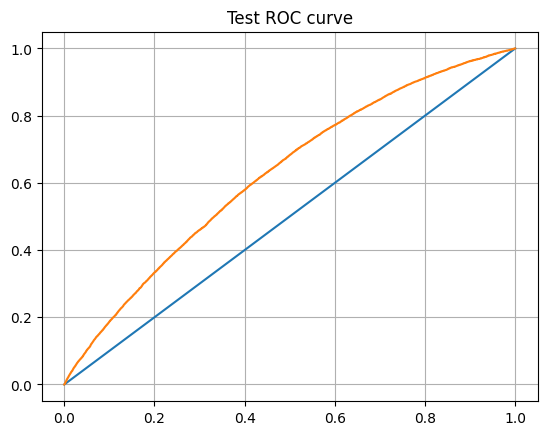

In [93]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
plt.plot(fpr, fpr)
plt.plot(fpr, tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()

In [94]:
confusion_matrix(y_test, y_test_pred)

array([[54483,    85],
       [15313,    49]], dtype=int64)

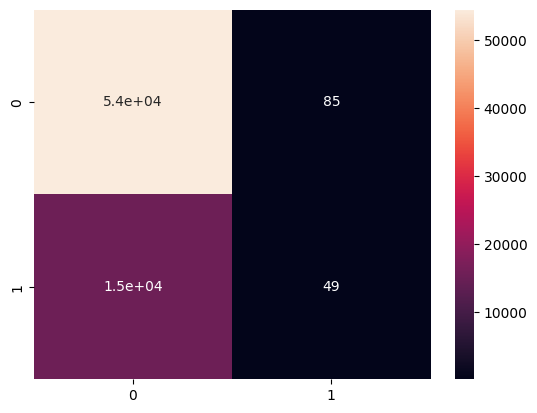

In [95]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot= True)
plt.show()

In [96]:
# FN's are too high, TP's are too low. Maybe applying SMOTE and balancing the data might help.
from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test, y_test_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54568
           1       0.37      0.00      0.01     15362

    accuracy                           0.78     69930
   macro avg       0.57      0.50      0.44     69930
weighted avg       0.69      0.78      0.69     69930



In [97]:
from sklearn.calibration import CalibratedClassifierCV
model_isotonic = CalibratedClassifierCV(lr, cv=3, method='isotonic')
model_isotonic.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LogisticRegression(random_state=24,
                                                         solver='liblinear'),
                       cv=3, method='isotonic')

In [98]:
isotonic_predict_prob_test = model_isotonic.predict_proba(X_test)

In [99]:
log_loss(y_test, isotonic_predict_prob_test)

0.5096634934389963

Using SMOTE to handle imbalance

In [100]:
!pip install imbalanced-learn

In [101]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
X_train_sm.shape, y_train_sm.shape

((255854, 16), (255854,))

In [102]:
lr1 = LogisticRegression(solver='liblinear', random_state=24)
lr1.fit(X_train_sm, y_train_sm)

LogisticRegression(random_state=24, solver='liblinear')

In [103]:
y_train_pred = lr1.predict(X_train_sm)
y_test_pred = lr1.predict(X_test)
y_train_prob = lr1.predict_proba(X_train_sm)
y_test_prob = lr1.predict_proba(X_test)

In [104]:
print('The train AUC score is:', roc_auc_score(y_train_sm, y_train_prob[:,1]))
print('The test AUC score is:', roc_auc_score(y_test, y_test_prob[:,1]))

The train AUC score is: 0.6300436142309771
The test AUC score is: 0.6255334045966204


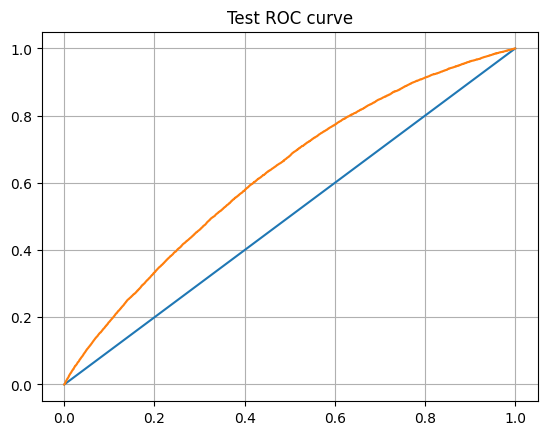

In [105]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()

In [106]:
confusion_matrix(y_test, y_test_pred)

array([[29539, 25029],
       [ 5534,  9828]], dtype=int64)

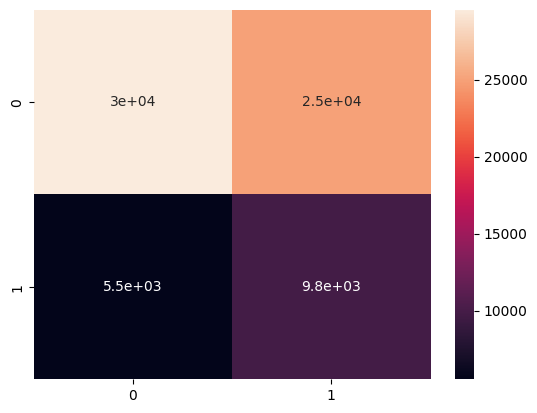

In [107]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot = True)
plt.show()

In [108]:
from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test,y_test_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       0.84      0.54      0.66     54568
           1       0.28      0.64      0.39     15362

    accuracy                           0.56     69930
   macro avg       0.56      0.59      0.53     69930
weighted avg       0.72      0.56      0.60     69930



In [109]:
from sklearn.calibration import CalibratedClassifierCV
model_isotonic = CalibratedClassifierCV(lr1, cv=3, method='isotonic')
model_isotonic.fit(X_train_sm,y_train_sm)

CalibratedClassifierCV(base_estimator=LogisticRegression(random_state=24,
                                                         solver='liblinear'),
                       cv=3, method='isotonic')

In [110]:
isotonic_predict_prob_test = model_isotonic.predict_proba(X_test)

In [111]:
log_loss(y_test,isotonic_predict_prob_test)

0.6690195113814453

## Random Forest Classifier

Modelling without SMOTE

In [112]:
rsearch1_best_params = {'max_depth': 13,
 'min_samples_leaf': 10,
 'min_samples_split': 11,
 'n_estimators': 374}

In [113]:
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier(**rsearch1_best_params, random_state=24)
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, min_samples_leaf=10, min_samples_split=11,
                       n_estimators=374, random_state=24)

In [114]:
y_train_pred = rfc1.predict(X_train)
y_test_pred = rfc1.predict(X_test)
y_train_prob = rfc1.predict_proba(X_train)
y_test_prob = rfc1.predict_proba(X_test)

In [115]:
print('The train AUC score is:',roc_auc_score(y_train,y_train_prob[:,1]))
print('The test AUC score is:',roc_auc_score(y_test,y_test_prob[:,1]))

The train AUC score is: 0.7563174663654705
The test AUC score is: 0.6458717770260827


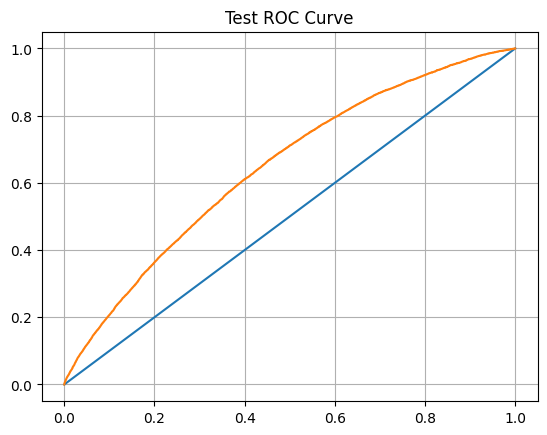

In [116]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:, 1])
plt.plot(fpr, fpr)
plt.plot(fpr, tpr)
plt.grid()
plt.title('Test ROC Curve')
plt.show()

In [117]:
confusion_matrix(y_test,y_test_pred)

array([[54545,    23],
       [15313,    49]], dtype=int64)

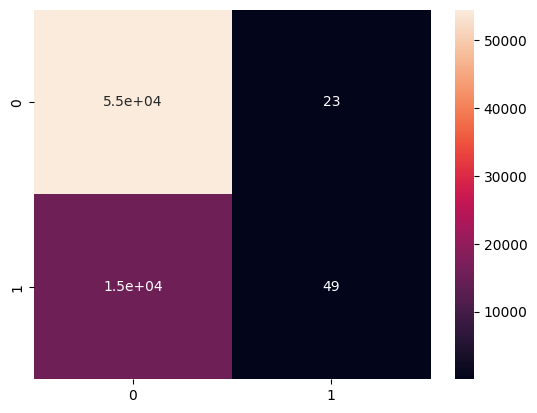

In [118]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)
plt.show()

In [119]:
from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test,y_test_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54568
           1       0.68      0.00      0.01     15362

    accuracy                           0.78     69930
   macro avg       0.73      0.50      0.44     69930
weighted avg       0.76      0.78      0.69     69930



In [120]:
from sklearn.calibration import CalibratedClassifierCV
model_isotonic = CalibratedClassifierCV(rfc1, cv=3, method='isotonic')
model_isotonic.fit(X_train,y_train)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(max_depth=13,
                                                             min_samples_leaf=10,
                                                             min_samples_split=11,
                                                             n_estimators=374,
                                                             random_state=24),
                       cv=3, method='isotonic')

In [121]:
isotonic_predict_prob_test = model_isotonic.predict_proba(X_test)
log_loss(y_test,isotonic_predict_prob_test)

0.5034372877568478

Modelling with SMOTE

In [122]:
rsearch_best_params = {'max_depth': 17,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 317}

In [123]:
rfc = RandomForestClassifier(**rsearch_best_params, random_state=24)
rfc.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=17, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=317, random_state=24)

In [124]:
y_train_pred = rfc.predict(X_train_sm)
y_test_pred = rfc.predict(X_test)
y_train_prob = rfc.predict_proba(X_train_sm)
y_test_prob = rfc.predict_proba(X_test)

In [125]:
print('The train AUC score is:',roc_auc_score(y_train_sm,y_train_prob[:,1]))
print('The test AUC score is:',roc_auc_score(y_test,y_test_prob[:,1]))

The train AUC score is: 0.9081348484250953
The test AUC score is: 0.6272710490508865


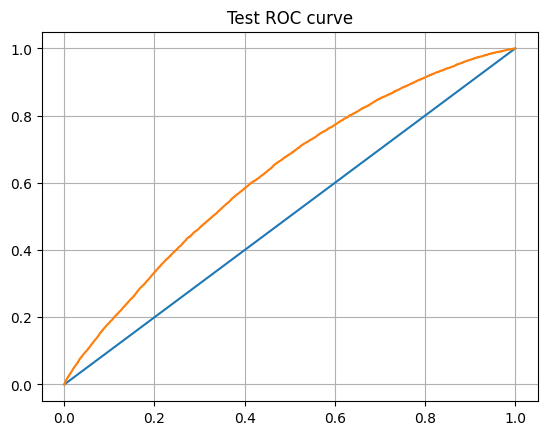

In [126]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()

In [127]:
confusion_matrix(y_test,y_test_pred)

array([[40889, 13679],
       [ 9159,  6203]], dtype=int64)

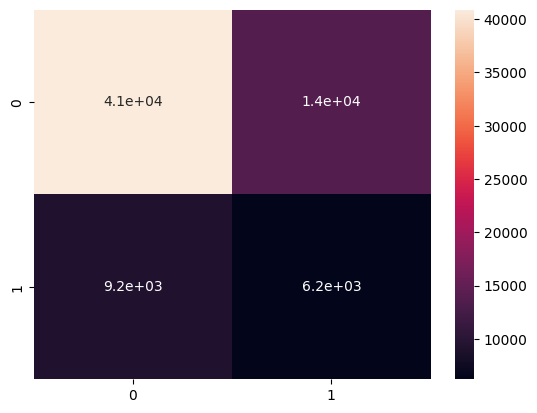

In [128]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)
plt.show()

In [129]:
from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test,y_test_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       0.82      0.75      0.78     54568
           1       0.31      0.40      0.35     15362

    accuracy                           0.67     69930
   macro avg       0.56      0.58      0.57     69930
weighted avg       0.71      0.67      0.69     69930



In [130]:
from sklearn.calibration import CalibratedClassifierCV
model_isotonic = CalibratedClassifierCV(rfc, cv=3, method='isotonic')
model_isotonic.fit(X_train_sm,y_train_sm)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(max_depth=17,
                                                             min_samples_leaf=2,
                                                             min_samples_split=4,
                                                             n_estimators=317,
                                                             random_state=24),
                       cv=3, method='isotonic')

In [131]:
isotonic_predict_prob_test = model_isotonic.predict_proba(X_test)
log_loss(y_test,isotonic_predict_prob_test)

0.5842528603583342

## LightGBM

Modelling without SMOTE

In [132]:
!pip install lightgbm

In [133]:
import lightgbm as lgb

In [134]:
rsearch1_best_params = {'learning_rate': 0.10308835171850986,
 'max_depth': 3,
 'n_estimators': 275,
 'num_leaves': 18}

In [135]:
lgbmc1 = lgb.LGBMClassifier(**rsearch1_best_params, importance_type='gain',random_state=24)
lgbmc1.fit(X_train, y_train)

LGBMClassifier(importance_type='gain', learning_rate=0.10308835171850986,
               max_depth=3, n_estimators=275, num_leaves=18, random_state=24)

In [136]:
y_train_pred = lgbmc1.predict(X_train)
y_test_pred = lgbmc1.predict(X_test)
y_train_prob = lgbmc1.predict_proba(X_train)
y_test_prob = lgbmc1.predict_proba(X_test)

In [137]:
print('The train AUC score is:',roc_auc_score(y_train,y_train_prob[:,1]))
print('The test AUC score is:',roc_auc_score(y_test,y_test_prob[:,1]))

The train AUC score is: 0.664242283058019
The test AUC score is: 0.6487618369704242


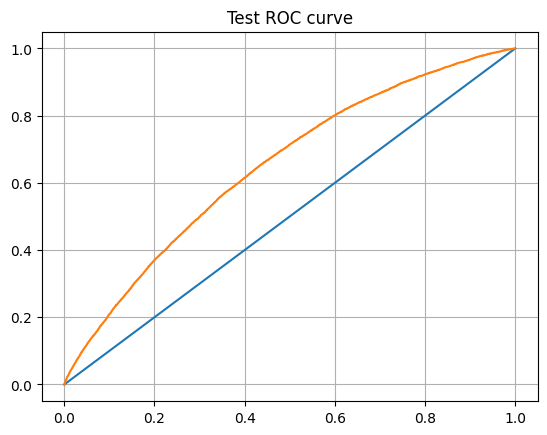

In [138]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()

In [139]:
confusion_matrix(y_test,y_test_pred)

array([[54438,   130],
       [15235,   127]], dtype=int64)

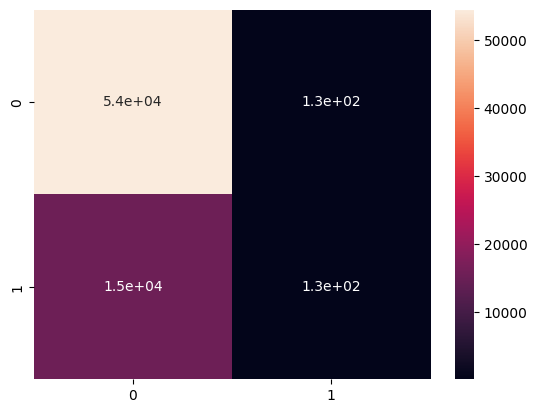

In [140]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)
plt.show()

In [141]:
from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test,y_test_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54568
           1       0.49      0.01      0.02     15362

    accuracy                           0.78     69930
   macro avg       0.64      0.50      0.45     69930
weighted avg       0.72      0.78      0.69     69930



In [142]:
from sklearn.calibration import CalibratedClassifierCV
model_isotonic = CalibratedClassifierCV(lgbmc1, cv=3, method='isotonic')
model_isotonic.fit(X_train,y_train)

CalibratedClassifierCV(base_estimator=LGBMClassifier(importance_type='gain',
                                                     learning_rate=0.10308835171850986,
                                                     max_depth=3,
                                                     n_estimators=275,
                                                     num_leaves=18,
                                                     random_state=24),
                       cv=3, method='isotonic')

In [143]:
isotonic_predict_prob_test = model_isotonic.predict_proba(X_test)
log_loss(y_test,isotonic_predict_prob_test)

0.5026884650888486

In [144]:
rsearch_best_params = {'learning_rate': 0.32585614358745185,
 'max_depth': 12,
 'n_estimators': 540,
 'num_leaves': 31}

In [145]:
lgbmc = lgb.LGBMClassifier(**rsearch_best_params, importance_type='gain',random_state=24)
lgbmc.fit(X_train_sm, y_train_sm)

LGBMClassifier(importance_type='gain', learning_rate=0.32585614358745185,
               max_depth=12, n_estimators=540, random_state=24)

In [146]:
y_train_pred = lgbmc.predict(X_train_sm)
y_test_pred = lgbmc.predict(X_test)
y_train_prob = lgbmc.predict_proba(X_train_sm)
y_test_prob = lgbmc.predict_proba(X_test)

In [147]:
print('The train AUC score is:',roc_auc_score(y_train_sm,y_train_prob[:,1]))
print('The test AUC score is:',roc_auc_score(y_test,y_test_prob[:,1]))

The train AUC score is: 0.9491806680078094
The test AUC score is: 0.618008572752217


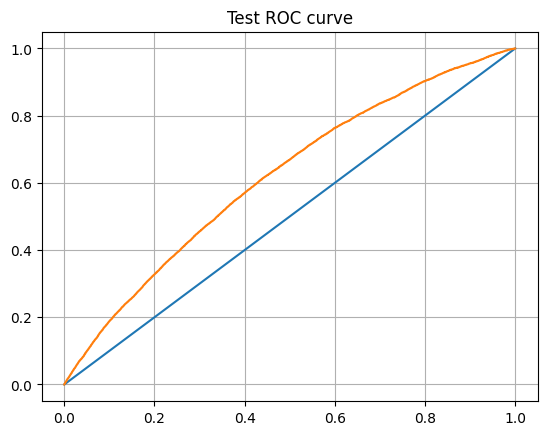

In [148]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()

In [149]:
confusion_matrix(y_test,y_test_pred)

array([[51772,  2796],
       [13805,  1557]], dtype=int64)

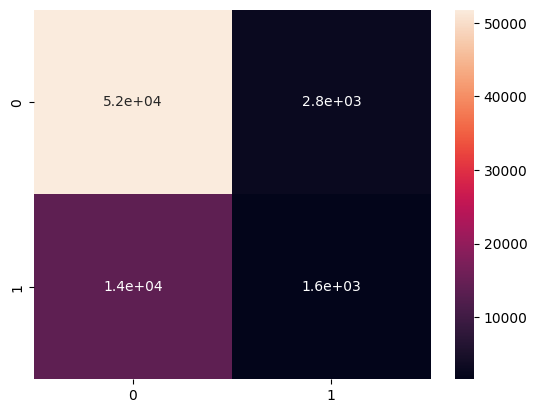

In [150]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)
plt.show()

In [151]:
from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test,y_test_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       0.79      0.95      0.86     54568
           1       0.36      0.10      0.16     15362

    accuracy                           0.76     69930
   macro avg       0.57      0.53      0.51     69930
weighted avg       0.69      0.76      0.71     69930



In [152]:
from sklearn.calibration import CalibratedClassifierCV
model_isotonic = CalibratedClassifierCV(lgbmc, cv=3, method='isotonic')
model_isotonic.fit(X_train_sm,y_train_sm)

CalibratedClassifierCV(base_estimator=LGBMClassifier(importance_type='gain',
                                                     learning_rate=0.32585614358745185,
                                                     max_depth=12,
                                                     n_estimators=540,
                                                     random_state=24),
                       cv=3, method='isotonic')

In [153]:
isotonic_predict_prob_test = model_isotonic.predict_proba(X_test)
log_loss(y_test,isotonic_predict_prob_test)

0.5134922576246735

## XGBoost

Modelling without SMOTE

In [154]:
!pip install xgboost --upgrade

In [155]:
import xgboost 
from xgboost import XGBClassifier
rsearch1_best_params = {'eval_metric': 'auc',
 'gamma': 0.3,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 270,
 'reg_alpha': 0.01}

In [156]:
xgbc1 = XGBClassifier(**rsearch1_best_params, random_state=24)
xgbc1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=270,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=24,
              reg_alpha=0.01, reg_lambda=1, ...)

In [157]:
y_train_pred = xgbc1.predict(X_train)
y_test_pred = xgbc1.predict(X_test)
y_train_prob = xgbc1.predict_proba(X_train)
y_test_prob = xgbc1.predict_proba(X_test)

In [158]:
print('The train AUC score is:',roc_auc_score(y_train,y_train_prob[:,1]))
print('The test AUC score is:',roc_auc_score(y_test,y_test_prob[:,1]))

The train AUC score is: 0.6639802730002117
The test AUC score is: 0.6483515443244011


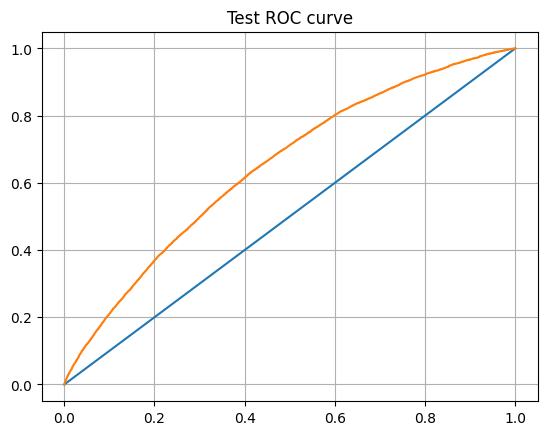

In [159]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()

In [160]:
confusion_matrix(y_test,y_test_pred)

array([[54461,   107],
       [15255,   107]], dtype=int64)

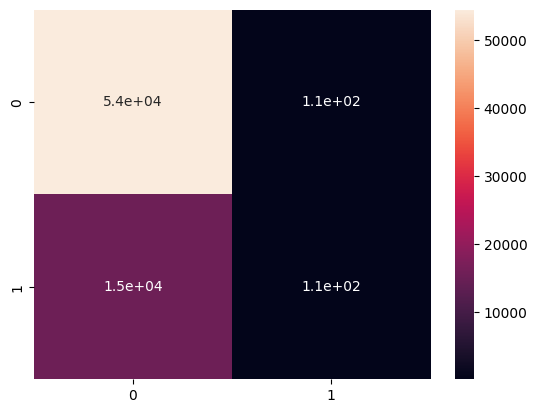

In [161]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)
plt.show()

In [162]:
from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test,y_test_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54568
           1       0.50      0.01      0.01     15362

    accuracy                           0.78     69930
   macro avg       0.64      0.50      0.45     69930
weighted avg       0.72      0.78      0.69     69930



In [163]:
xgboost.__version__

'1.6.2'

In [164]:
from sklearn.calibration import CalibratedClassifierCV
model_isotonic = CalibratedClassifierCV(xgbc1, cv=3, method='isotonic')
model_isotonic.fit(X_train,y_train)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    callbacks=None,
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1,
                                                    early_stopping_rounds=None,
                                                    enable_categorical=False,
                                                    eval_metric='auc',
                                                    gamma=0.3, gpu_id=-1,
                                                    grow_policy='depthwise',
                                                    importance_type=None,
                                                    interaction_constraints='',
                                           

In [165]:
isotonic_predict_prob_test = model_isotonic.predict_proba(X_test)
log_loss(y_test,isotonic_predict_prob_test)

0.5028733676944565

Modelling with SMOTE

In [166]:
rsearch_best_params = {'eval_metric': 'auc',
 'gamma': 0.2,
 'learning_rate': 0.2,
 'max_depth': 9,
 'n_estimators': 192,
 'reg_alpha': 0.1}

In [167]:
xgbc = XGBClassifier(**rsearch_best_params, random_state=24)
xgbc.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=192,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=24,
              reg_alpha=0.1, reg_lambda=1, ...)

In [168]:
y_train_pred = xgbc.predict(X_train_sm)
y_test_pred = xgbc.predict(X_test)
y_train_prob = xgbc.predict_proba(X_train_sm)
y_test_prob = xgbc.predict_proba(X_test)

In [169]:
print('The train AUC score is:',roc_auc_score(y_train_sm,y_train_prob[:,1]))
print('The test AUC score is:',roc_auc_score(y_test,y_test_prob[:,1]))

The train AUC score is: 0.949510551162011
The test AUC score is: 0.6268705473607559


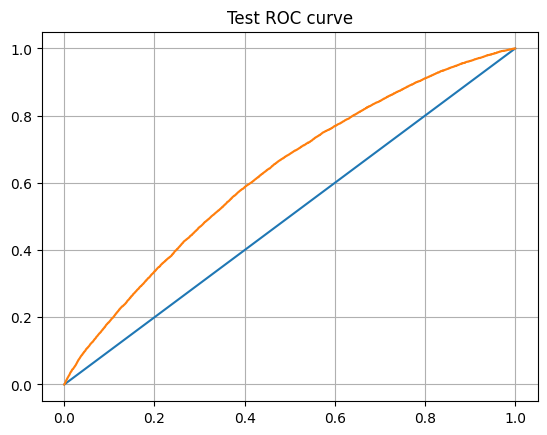

In [170]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()

In [171]:
confusion_matrix(y_test, y_test_pred)

array([[52644,  1924],
       [14129,  1233]], dtype=int64)

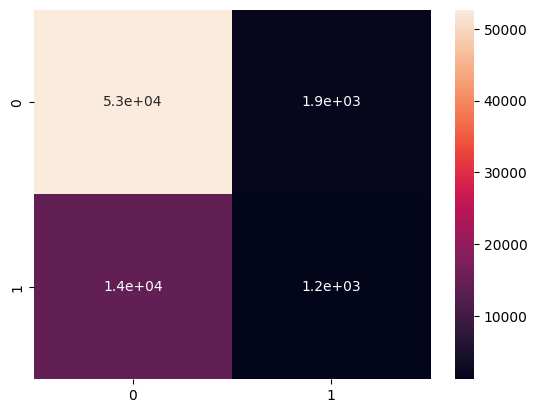

In [172]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)
plt.show()

In [173]:
from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test,y_test_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     54568
           1       0.39      0.08      0.13     15362

    accuracy                           0.77     69930
   macro avg       0.59      0.52      0.50     69930
weighted avg       0.70      0.77      0.71     69930



In [174]:
from sklearn.calibration import CalibratedClassifierCV
model_isotonic = CalibratedClassifierCV(xgbc, cv=3, method='isotonic')
model_isotonic.fit(X_train_sm,y_train_sm)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    callbacks=None,
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1,
                                                    early_stopping_rounds=None,
                                                    enable_categorical=False,
                                                    eval_metric='auc',
                                                    gamma=0.2, gpu_id=-1,
                                                    grow_policy='depthwise',
                                                    importance_type=None,
                                                    interaction_constraints='',
                                           

In [175]:
isotonic_predict_prob_test = model_isotonic.predict_proba(X_test)
log_loss(y_test,isotonic_predict_prob_test)

0.5141567594118196

## Stacking

Modelling without SMOTE

In [176]:
from sklearn.ensemble import StackingClassifier
estimators = [
('rfc',RandomForestClassifier(max_depth = 13,
 min_samples_leaf = 10,
 min_samples_split = 11,
 n_estimators = 374)),
 
('lgbmc',lgb.LGBMClassifier(learning_rate = 0.10308835171850986,
 max_depth = 3,
 n_estimators = 275,
 num_leaves = 18)),
 
('xgbc', XGBClassifier(eval_metric = 'auc',
 gamma = 0.3,
 learning_rate = 0.1,
 max_depth = 3,
 n_estimators = 270,
 reg_alpha = 0.01))
]

In [177]:
clf1 = StackingClassifier(estimators=estimators,final_estimator=LogisticRegression(solver='liblinear'),
                        cv = 5, n_jobs=-1)
clf1.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('rfc',
                                RandomForestClassifier(max_depth=13,
                                                       min_samples_leaf=10,
                                                       min_samples_split=11,
                                                       n_estimators=374)),
                               ('lgbmc',
                                LGBMClassifier(learning_rate=0.10308835171850986,
                                               max_depth=3, n_estimators=275,
                                               num_leaves=18)),
                               ('xgbc',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=No...
                                              learning_r

In [178]:
y_train_pred = clf1.predict(X_train)
y_test_pred = clf1.predict(X_test)
y_train_prob = clf1.predict_proba(X_train)
y_test_prob = clf1.predict_proba(X_test)

In [179]:
print('The train AUC score is:',roc_auc_score(y_train,y_train_prob[:,1]))
print('The test AUC score is:',roc_auc_score(y_test,y_test_prob[:,1]))

The train AUC score is: 0.7118985004812949
The test AUC score is: 0.6490375768906461


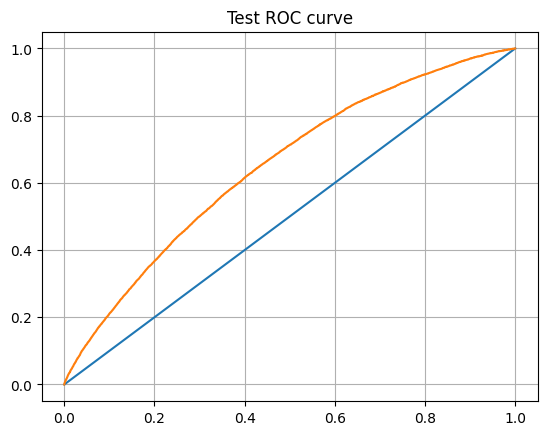

In [180]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()

In [181]:
confusion_matrix(y_test,y_test_pred)

array([[54125,   443],
       [14942,   420]], dtype=int64)

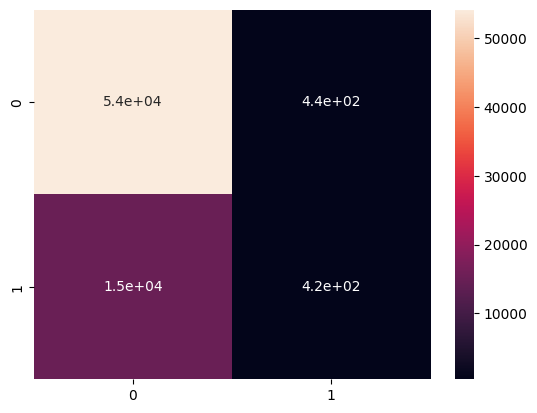

In [182]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)
plt.show()

In [183]:
from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test,y_test_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       0.78      0.99      0.88     54568
           1       0.49      0.03      0.05     15362

    accuracy                           0.78     69930
   macro avg       0.64      0.51      0.46     69930
weighted avg       0.72      0.78      0.69     69930



In [184]:
from sklearn.calibration import CalibratedClassifierCV
model_isotonic = CalibratedClassifierCV(clf1, cv=3, method='isotonic')
model_isotonic.fit(X_train,y_train)

CalibratedClassifierCV(base_estimator=StackingClassifier(cv=5,
                                                         estimators=[('rfc',
                                                                      RandomForestClassifier(max_depth=13,
                                                                                             min_samples_leaf=10,
                                                                                             min_samples_split=11,
                                                                                             n_estimators=374)),
                                                                     ('lgbmc',
                                                                      LGBMClassifier(learning_rate=0.10308835171850986,
                                                                                     max_depth=3,
                                                                                     n_estimators=275,
           

In [185]:
isotonic_predict_prob_test = model_isotonic.predict_proba(X_test)
log_loss(y_test,isotonic_predict_prob_test)

0.5025319076579412

Modelling with SMOTE

In [186]:
from sklearn.ensemble import StackingClassifier
estimators = [
('rfc',RandomForestClassifier(max_depth = 17,
 min_samples_leaf = 2,
 min_samples_split = 4,
 n_estimators = 317)),
 
('lgbmc',lgb.LGBMClassifier(learning_rate = 0.32585614358745185,
 max_depth = 12,
 n_estimators = 540,
 num_leaves = 31)),
 
('xgbc', XGBClassifier(eval_metric = 'auc',
 gamma = 0.2,
 learning_rate = 0.2,
 max_depth = 9,
 n_estimators = 192,
 reg_alpha = 0.1))
]

In [187]:
clf = StackingClassifier(estimators=estimators,final_estimator=LogisticRegression(solver='liblinear'),
                        cv = 5, n_jobs=-1)
clf.fit(X_train_sm,y_train_sm)

StackingClassifier(cv=5,
                   estimators=[('rfc',
                                RandomForestClassifier(max_depth=17,
                                                       min_samples_leaf=2,
                                                       min_samples_split=4,
                                                       n_estimators=317)),
                               ('lgbmc',
                                LGBMClassifier(learning_rate=0.32585614358745185,
                                               max_depth=12,
                                               n_estimators=540)),
                               ('xgbc',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_by...
          

In [188]:
y_train_pred = clf.predict(X_train_sm)
y_test_pred = clf.predict(X_test)
y_train_prob = clf.predict_proba(X_train_sm)
y_test_prob = clf.predict_proba(X_test)

In [189]:
print('The train AUC score is:',roc_auc_score(y_train_sm,y_train_prob[:,1]))
print('The test AUC score is:',roc_auc_score(y_test,y_test_prob[:,1]))

The train AUC score is: 0.9537356640706053
The test AUC score is: 0.6340864305575377


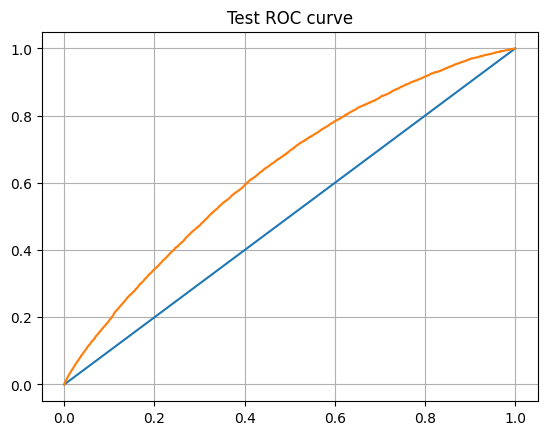

In [190]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()

In [191]:
confusion_matrix(y_test,y_test_pred)

array([[48910,  5658],
       [12327,  3035]], dtype=int64)

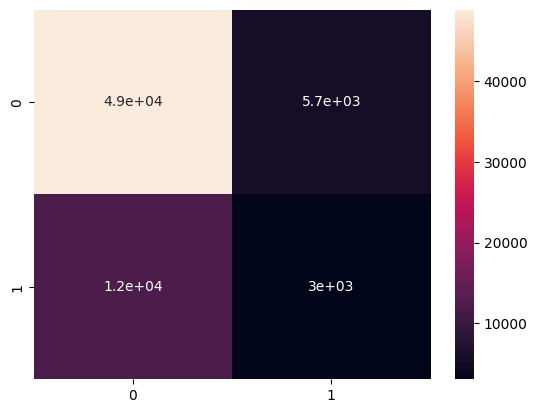

In [192]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)
plt.show()

In [193]:
from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test,y_test_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       0.80      0.90      0.84     54568
           1       0.35      0.20      0.25     15362

    accuracy                           0.74     69930
   macro avg       0.57      0.55      0.55     69930
weighted avg       0.70      0.74      0.71     69930



In [194]:
from sklearn.calibration import CalibratedClassifierCV
model_isotonic = CalibratedClassifierCV(clf, cv=3, method='isotonic')
model_isotonic.fit(X_train_sm,y_train_sm)

CalibratedClassifierCV(base_estimator=StackingClassifier(cv=5,
                                                         estimators=[('rfc',
                                                                      RandomForestClassifier(max_depth=17,
                                                                                             min_samples_leaf=2,
                                                                                             min_samples_split=4,
                                                                                             n_estimators=317)),
                                                                     ('lgbmc',
                                                                      LGBMClassifier(learning_rate=0.32585614358745185,
                                                                                     max_depth=12,
                                                                                     n_estimators=540)),
          

In [195]:
isotonic_predict_prob_test = model_isotonic.predict_proba(X_test)
log_loss(y_test,isotonic_predict_prob_test)

0.5177294783717683

## Summary stats of all Models

In [196]:
!pip install PrettyTable

In [197]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Model","Train-AUC","Test-AUC","Test-Binary_Log_Loss","F1-Score(1)","SMOTE-applied"]

x.add_row(["Logistic Regression", 0.623, 0.623, 0.509, 0.01,'No'])
x.add_row(["Logistic Regression", 0.624, 0.623, 0.670, 0.39,'Yes'])
x.add_row(["Random Forest Classifier", 0.727, 0.637, 0.503, 0.00,'No'])
x.add_row(["Random Forest Classifier", 0.855, 0.625, 0.614, 0.38,'Yes'])
x.add_row(["LightGBM Classifier", 0.652, 0.639, 0.503, 0.01,'No'])
x.add_row(["LightGBM Classifier", 0.928, 0.601, 0.527, 0.22,'Yes'])
x.add_row(["XGBoost Classifier", 0.652, 0.638, 0.503, 0.01,'No'])
x.add_row(["XGBoost Classifier", 0.936, 0.610, 0.523, 0.20,'Yes'])
x.add_row(["Stacked Classifier", 0.690, 0.639, 0.503, 0.03,'No'])
x.add_row(["Stacked Classifier", 0.936, 0.618, 0.523, 0.29,'Yes'])


print(x)

+--------------------------+-----------+----------+----------------------+-------------+---------------+
|          Model           | Train-AUC | Test-AUC | Test-Binary_Log_Loss | F1-Score(1) | SMOTE-applied |
+--------------------------+-----------+----------+----------------------+-------------+---------------+
|   Logistic Regression    |   0.623   |  0.623   |        0.509         |     0.01    |       No      |
|   Logistic Regression    |   0.624   |  0.623   |         0.67         |     0.39    |      Yes      |
| Random Forest Classifier |   0.727   |  0.637   |        0.503         |     0.0     |       No      |
| Random Forest Classifier |   0.855   |  0.625   |        0.614         |     0.38    |      Yes      |
|   LightGBM Classifier    |   0.652   |  0.639   |        0.503         |     0.01    |       No      |
|   LightGBM Classifier    |   0.928   |  0.601   |        0.527         |     0.22    |      Yes      |
|    XGBoost Classifier    |   0.652   |  0.638   |    

In [198]:
test_df.columns

Index(['disbursed_amount', 'ltv', 'manufacturer_id', 'State_ID', 'Aadhar_flag',
       'VoterID_flag', 'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'CREDIT.HISTORY.LENGTH',
       'NO.OF_INQUIRIES', 'self_employed', 'Age', 'risk', 'active_accts',
       'overdue_accts', 'sanctioned_amount', 'install_amt'],
      dtype='object')

In [199]:
train_df.columns

Index(['disbursed_amount', 'ltv', 'manufacturer_id', 'State_ID', 'Aadhar_flag',
       'VoterID_flag', 'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'CREDIT.HISTORY.LENGTH',
       'NO.OF_INQUIRIES', 'loan_default', 'self_employed', 'Age', 'risk',
       'active_accts', 'overdue_accts', 'sanctioned_amount', 'install_amt'],
      dtype='object')

## Pickling the model for deployment

In [200]:
import pickle

In [201]:
pickle.dump(lr1, open('lr1.pkl', 'wb'))

In [202]:
pickle.dump(sc, open('sc.pkl', 'wb'))

In [203]:
pickle.dump(smote, open('smote.pkl', 'wb'))

In [204]:
np.array(train_df)[0].reshape(1, -1)

array([[ 5.0578e+04,  8.9550e+01,  4.5000e+01,  6.0000e+00,  1.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  3.4000e+01, -1.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00]])

In [205]:
sc.transform(np.array(train_df.drop('loan_default',axis=1))[0].reshape(1, -1))

array([[-0.2989983 ,  1.29216347, -1.08527232, -0.28157555,  0.43594336,
        -0.41175535, -0.40164755, -0.56934536, -0.29464764, -1.17574133,
        -0.0101393 , -0.82560669, -0.54719433, -0.29029877, -0.21510282,
        -0.12568264]])

In [206]:
lr1.predict(sc.transform(np.array(train_df.drop('loan_default',axis=1).values)[0].reshape(1, -1)))

array([1], dtype=int64)

In [207]:
pickled_model = pickle.load(open('lr1.pkl', 'rb'))

In [208]:
X[0].shape

(16,)

In [209]:
y[0]

0

In [210]:
pickled_model.predict(sc.transform(np.array(X)[0].reshape(1, -1)))

array([1], dtype=int64)

In [211]:
np.array(train_df.drop('loan_default',axis=1).values)[0].reshape(1, -1)

array([[ 5.0578e+04,  8.9550e+01,  4.5000e+01,  6.0000e+00,  1.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         3.4000e+01, -1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00]])